# Bank data analysis



The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  


The first part of the analysis is visualization and display of data in order to be able to make better statistical and descriptive analysis.

An exploratory data analysis or EDA is often the first thing we do to introduce ourselves to a new dataset. It is performed to make general observations about the data, summarize it, explore some basic trends or uncover hidden relations between variables. Data visualisation can help us to better navigate in the new data and present EDA findings. In this part of project we want to add some value of the dataset that we need to analyze.

In [396]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas.plotting
import math
%matplotlib inline

## Read data, visualize, basic statistics, understand it

In [397]:
#read data
data = pd.read_csv('dataset.csv',sep = ';')  
# visualize the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [398]:
# data statistics
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [399]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [400]:
data['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

This shows that this is an unbalanced problem.

In [401]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [402]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\3194449403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['y'], palette="Set3")


Text(0.5, 0, 'Target class')

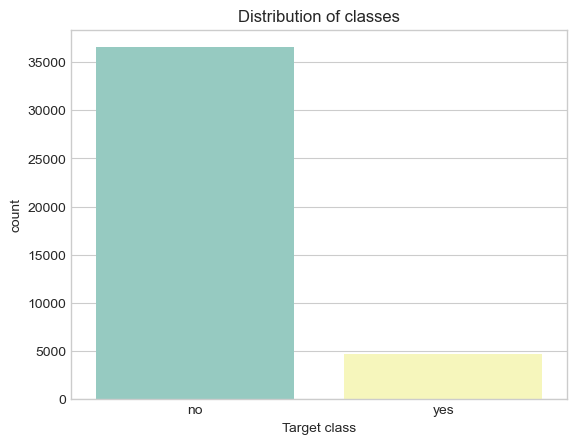

In [403]:
from matplotlib import pyplot as plt
sns.countplot(x=data['y'], palette="Set3")
plt.title('Distribution of classes')
plt.xlabel('Target class')

## Exploratory Data Analysis

to understand the data it is necessary to make a good visualization

#### pdays

In [404]:
data.pdays.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [405]:
data.drop(columns=['pdays'],inplace = True)

#### age

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\1525899248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="age", palette="Set3")


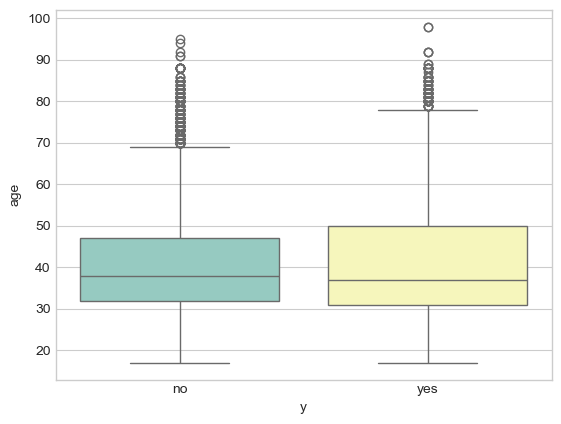

In [406]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age", palette="Set3")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

Text(0.5, 1.0, 'PDF of age for target variable y')

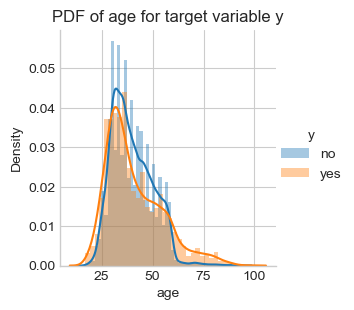

In [407]:
sns.FacetGrid(data, hue='y') \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y')

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\1645807204.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<Axes: >

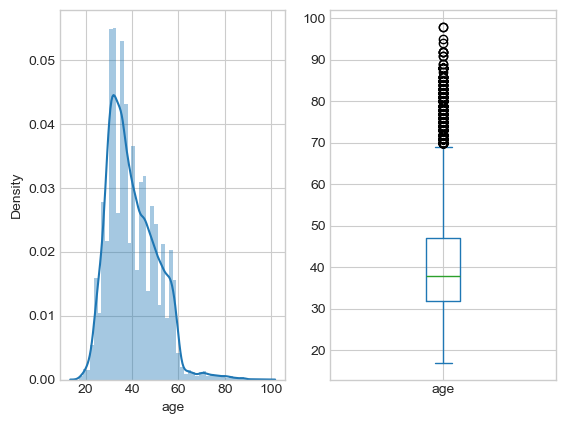

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
plt.subplot(121)
sns.distplot(data['age'])
plt.subplot(122)
data['age'].plot.box()

In [409]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 58.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 59.0
98% of people having age are less than equal to 62.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 98.0
IQR 15.0


In [410]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [411]:
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

<Axes: xlabel='age_group', ylabel='count'>

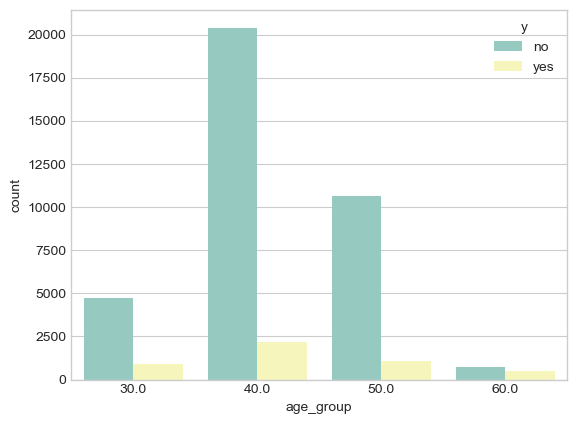

In [412]:
sns.countplot(x='age_group', data=data, hue='y', palette="Set3")

In [413]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].y.value_counts()[1]/len(data[data['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].y.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].y.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].y.value_counts()[1]/len(data[data['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5669, Success rate: 0.1626389133886047
Clients of age 30-45 contacted: 22585, Success rate: 0.0959929156519814
Clients of age 40-60 contacted: 11741, Success rate: 0.09181500723958777
Clients of 60+ age contacted: 1193, Success rate: 0.3956412405699916


C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\2902987473.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].y.value_counts()[1]/len(data[data['age_group'] == 30])))
C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\2902987473.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].y.value_counts()[1]/len(data[data['age_group'] == 40])))
C:\Users\Tobias\AppDat

This graph indicates that the bank was focused on the 30s aged group(red bar), but this group has lower subscription rates(green bar) compared to the others aged groups.The bank was more effective with 20s and 60s aged group, which should be the next target. Considering that the term deposits are the most liquid and the most secure investment, the pattern is expected.The oldest aged group want to have cash and youngest do not have experience, knowledge and enough money for better and more sophisticated investments. On other hand, the 30s aged group have more loans and less money for savings.

#### duration

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\2027837379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="duration", palette="Set3")


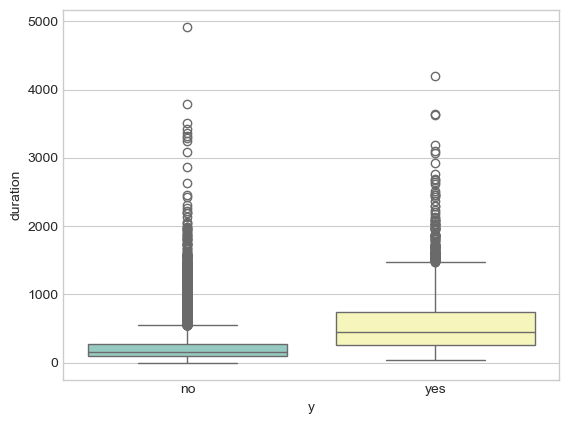

In [414]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration", palette="Set3")
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

Text(0.5, 1.0, 'PDF of duration for target variable y')

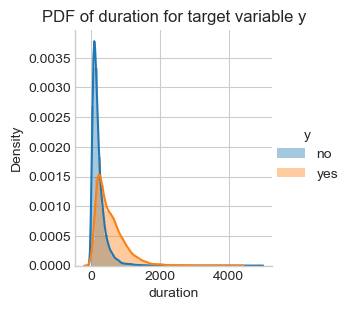

In [415]:
sns.FacetGrid(data, hue='y') \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\1384163063.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['duration'])


<Axes: >

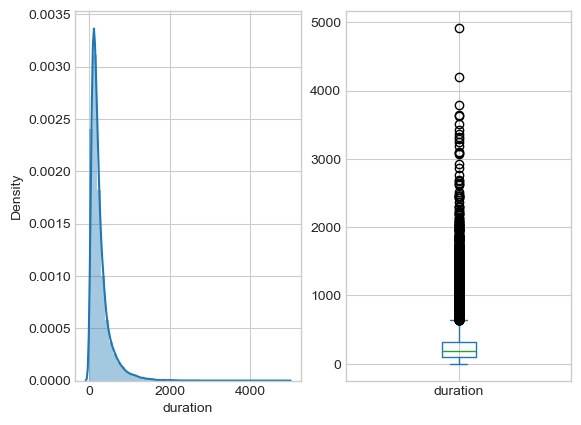

In [416]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['duration'])
plt.subplot(122)
data['duration'].plot.box()

In [417]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))
iqr = data.duration.quantile(0.75) - data.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 752.6500000000015
96% of calls have duration less than equal to 820.5199999999968
97% of calls have duration less than equal to 911.0
98% of calls have duration less than equal to 1052.260000000002
99% of calls have duration less than equal to 1271.1299999999974
100% of calls have duration less than equal to 4918.0
IQR 217.0


#### campaign

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\1271342999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="campaign", palette="Set3")


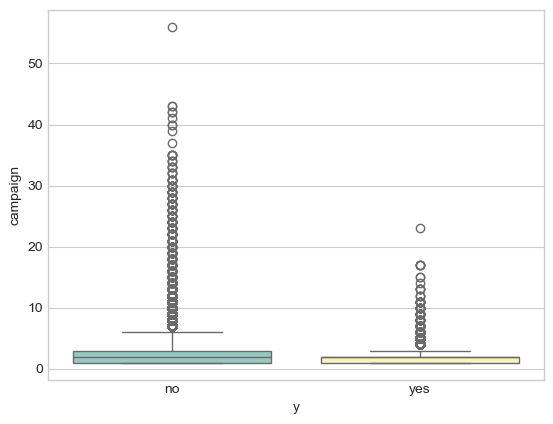

In [418]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign", palette="Set3")
plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\4019659708.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['campaign'])


<Axes: >

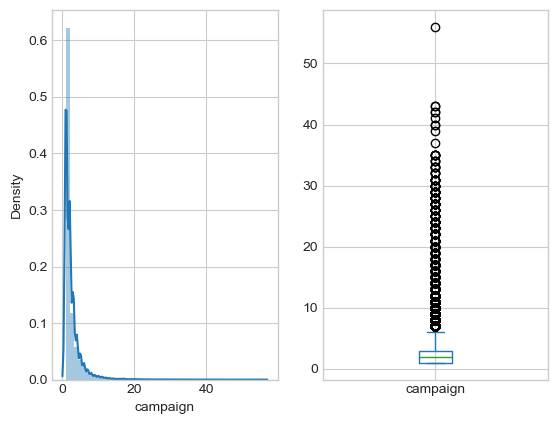

In [419]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['campaign'])
plt.subplot(122)
data['campaign'].plot.box()

c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

Text(0.5, 1.0, 'PDF of campaign for target variable y')

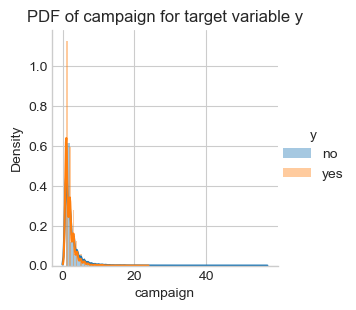

In [420]:
sns.FacetGrid(data, hue='y' ) \
.map(sns.distplot, 'campaign') \
.add_legend()
plt.title('PDF of campaign for target variable y')

#### emp.var.rate

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\296154189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="emp.var.rate", palette="Set3")


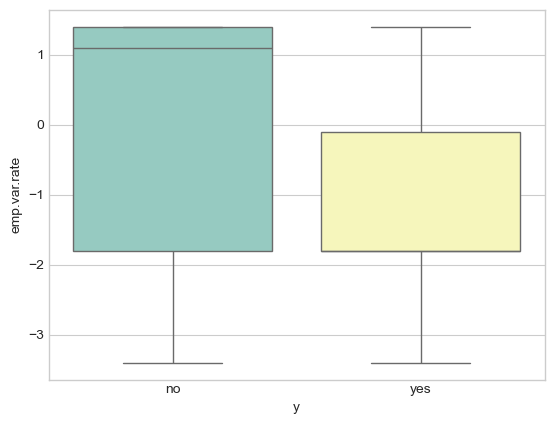

In [421]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="emp.var.rate", palette="Set3")
plt.show()

c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

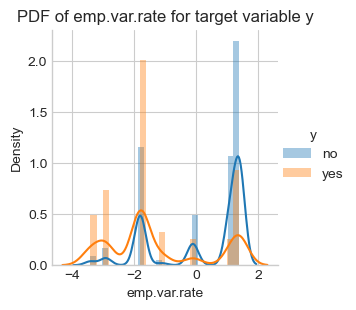

In [422]:
sns.FacetGrid(data, hue='y' ) \
.map(sns.distplot, 'emp.var.rate') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

#### cons.price.idx

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\3977575894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="cons.price.idx", palette="Set3")


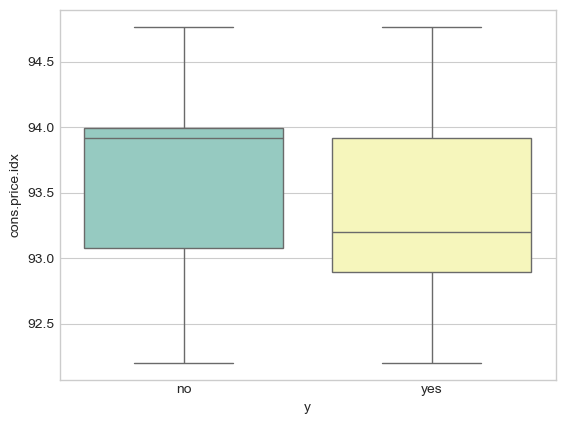

In [423]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.price.idx", palette="Set3")
plt.show()

c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

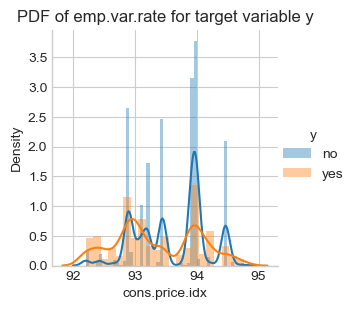

In [424]:
sns.FacetGrid(data, hue='y' ) \
.map(sns.distplot, 'cons.price.idx') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

#### cons.conf.idx

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\2318100592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="cons.conf.idx", palette="Set3")


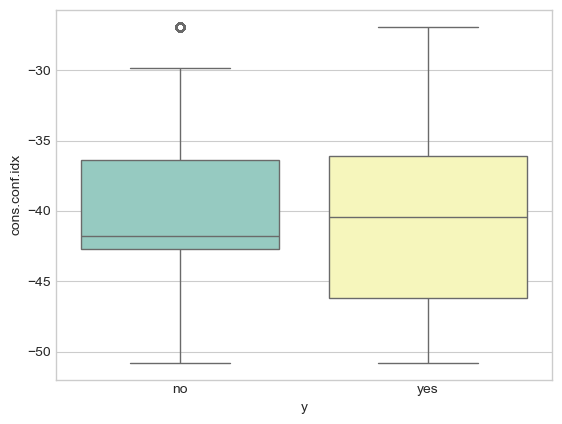

In [425]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.conf.idx", palette="Set3")
plt.show()

c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

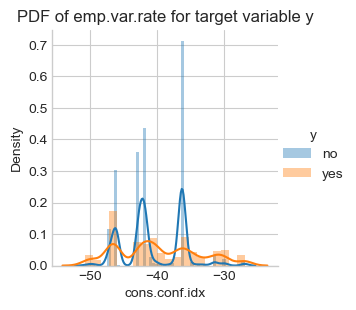

In [426]:
sns.FacetGrid(data, hue='y' ) \
.map(sns.distplot, 'cons.conf.idx') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

#### nr.employed

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\532953110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="y", y="nr.employed", palette="Set3")


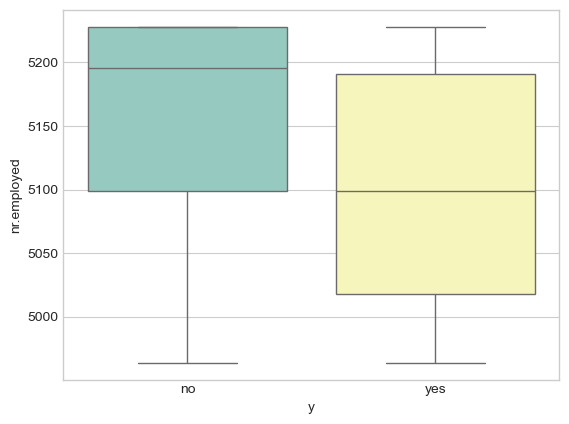

In [427]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="nr.employed", palette="Set3")
plt.show()

c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Tobias\git\Bank-Marketing\.conda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwar

Text(0.5, 1.0, 'PDF of emp.var.rate for target variable y')

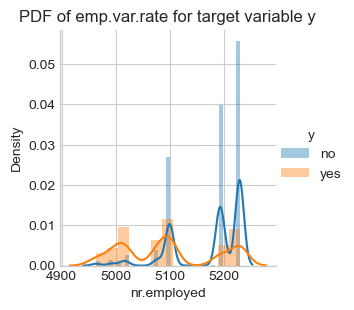

In [428]:
sns.FacetGrid(data, hue='y' ) \
.map(sns.distplot, 'nr.employed') \
.add_legend()
plt.title('PDF of emp.var.rate for target variable y')

### Distribution of Class variable

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\4241305325.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="y", data=data, palette="Set3")
C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\4241305325.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


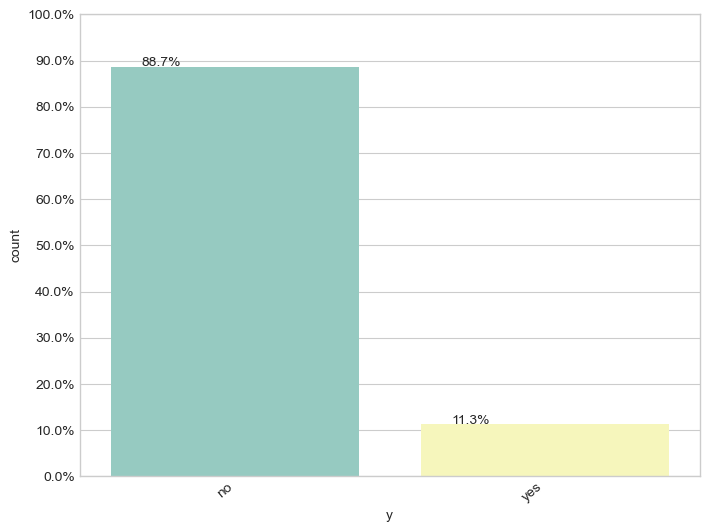

In [429]:
plt.figure(figsize=(8,6))
Y = data['y']
total = len(Y)*1.
ax=sns.countplot(x="y", data=data, palette="Set3")
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

<Axes: xlabel='marital'>

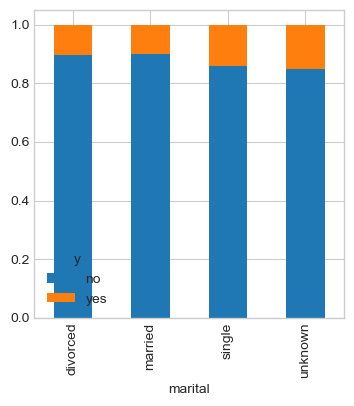

In [430]:
Marriage=pd.crosstab(data["marital"],data['y'])
Marriage.div(Marriage.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='education'>

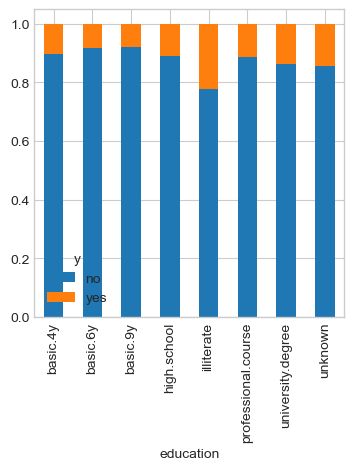

In [431]:
Education=pd.crosstab(data["education"],data['y'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='housing'>

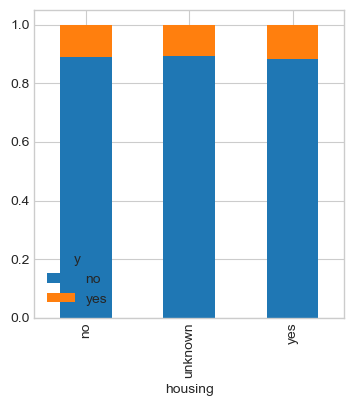

In [432]:
House=pd.crosstab(data["housing"],data['y'])
House.div(House.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='loan'>

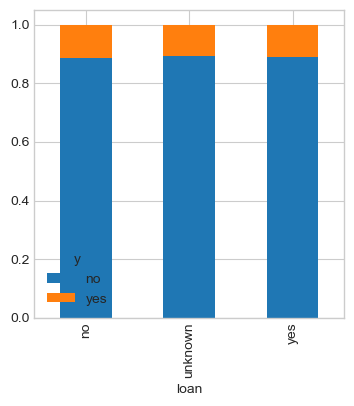

In [433]:
Loan=pd.crosstab(data["loan"],data['y'])
Loan.div(Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='contact'>

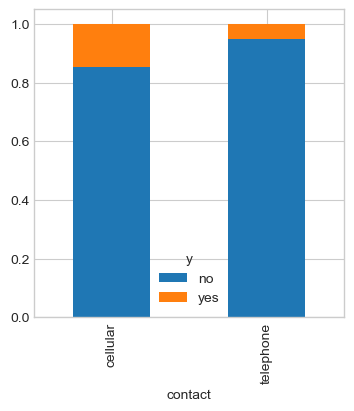

In [434]:
Con=pd.crosstab(data["contact"],data['y'])
Con.div(Con.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='poutcome'>

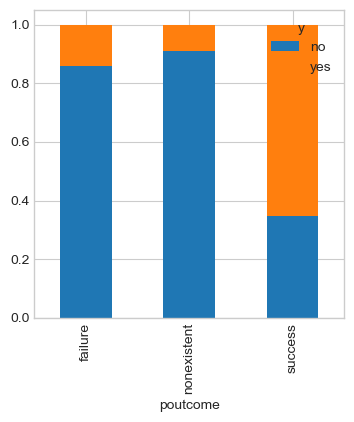

In [435]:
POC=pd.crosstab(data["poutcome"],data['y'])
POC.div(POC.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<Axes: xlabel='y'>

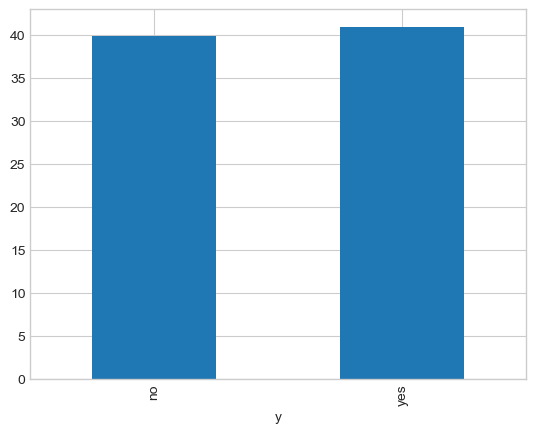

In [436]:
data.groupby('y')['age'].mean().plot.bar()

<Axes: xlabel='y'>

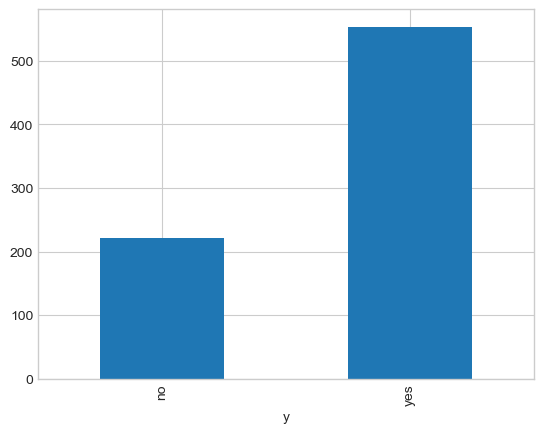

In [437]:
data.groupby('y')['duration'].mean().plot.bar()

### Аdditional functions for better attribute visualization and comparative analysis

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [439]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


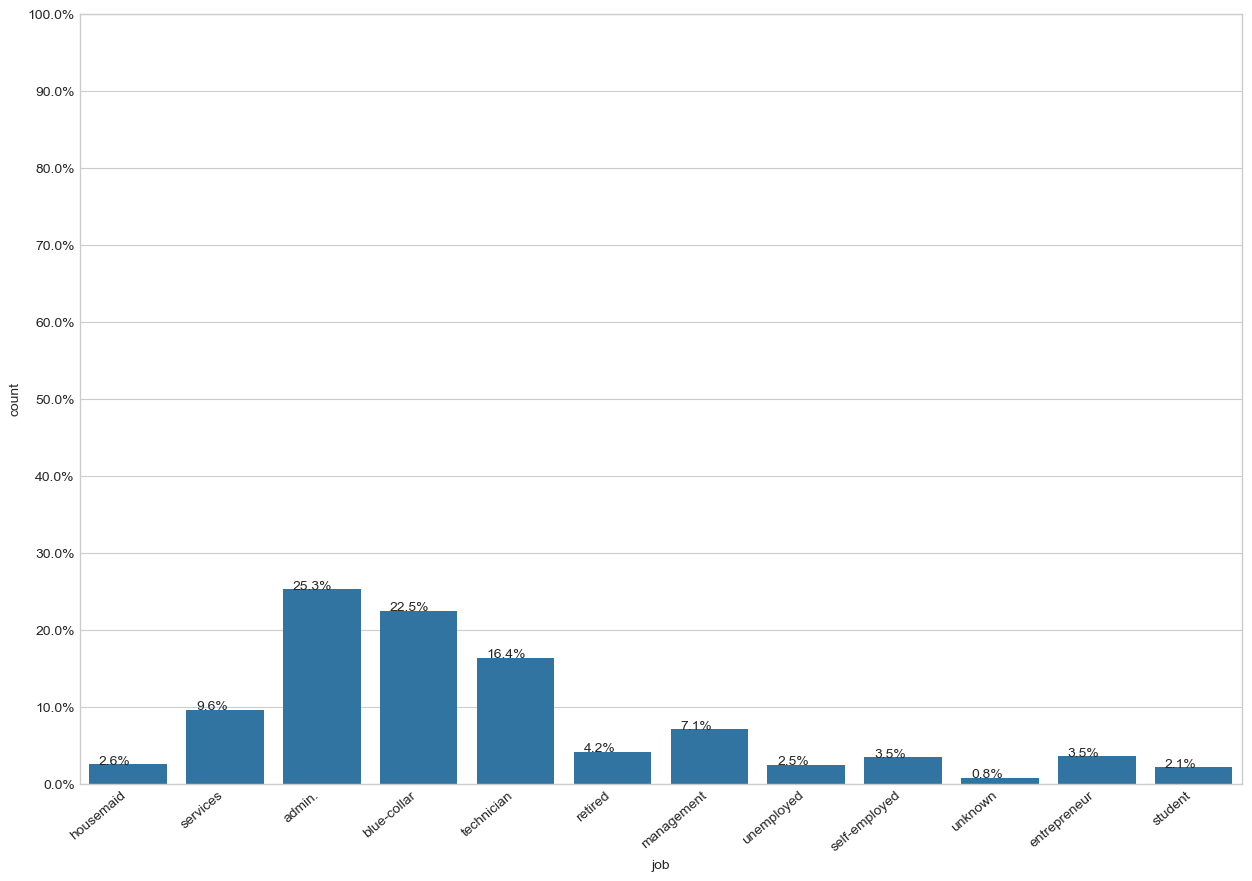

In [440]:
countplot("job", data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


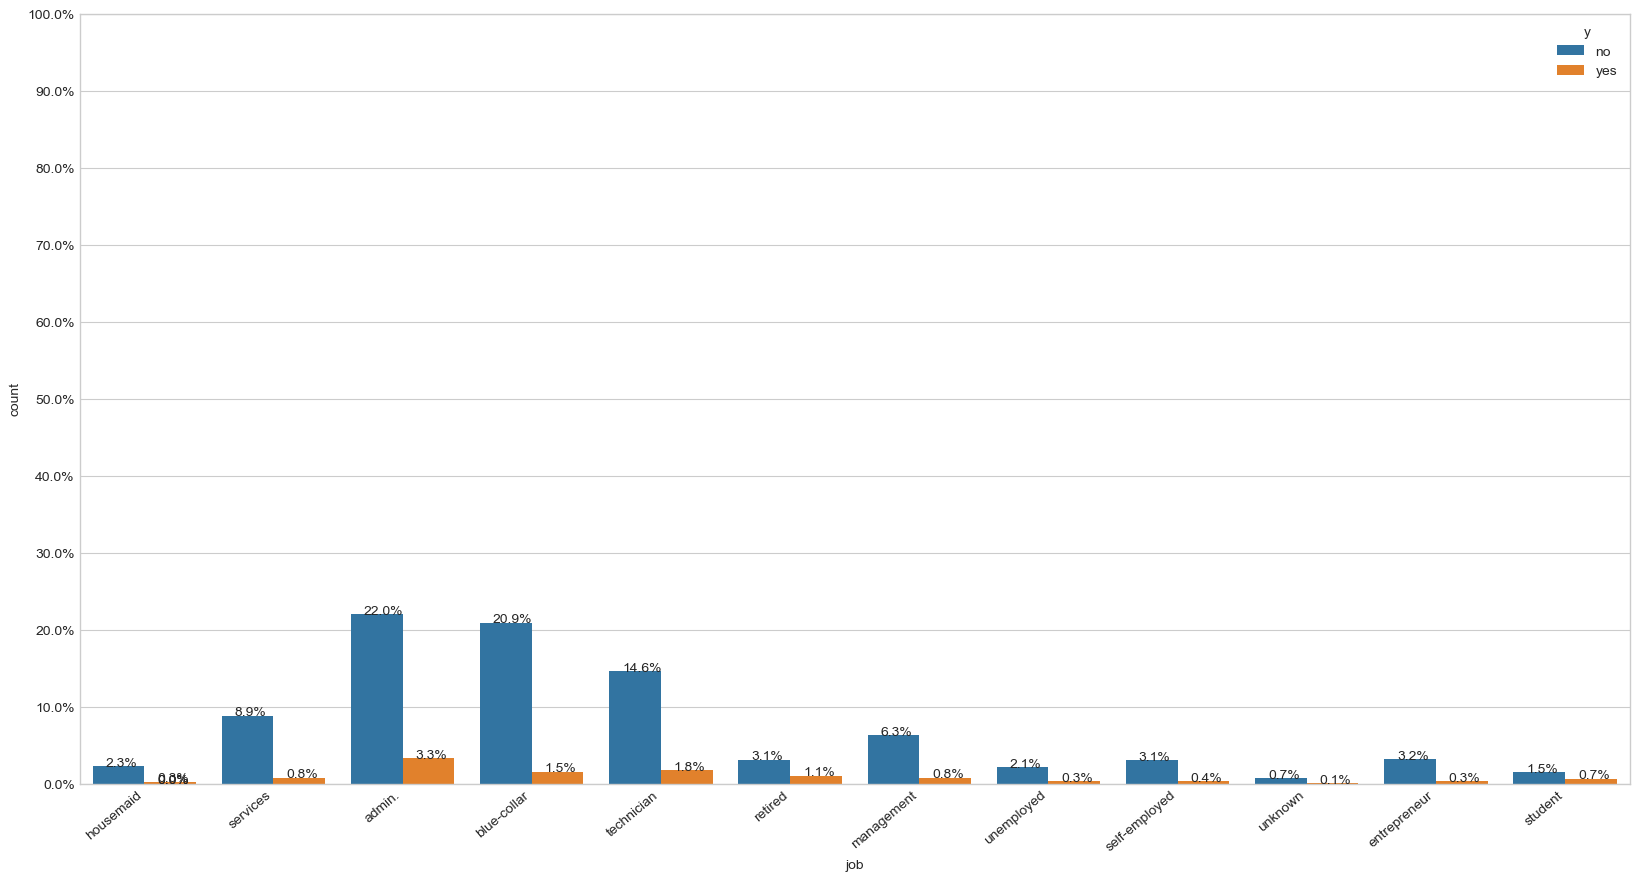

In [441]:
countplot_withY("job", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


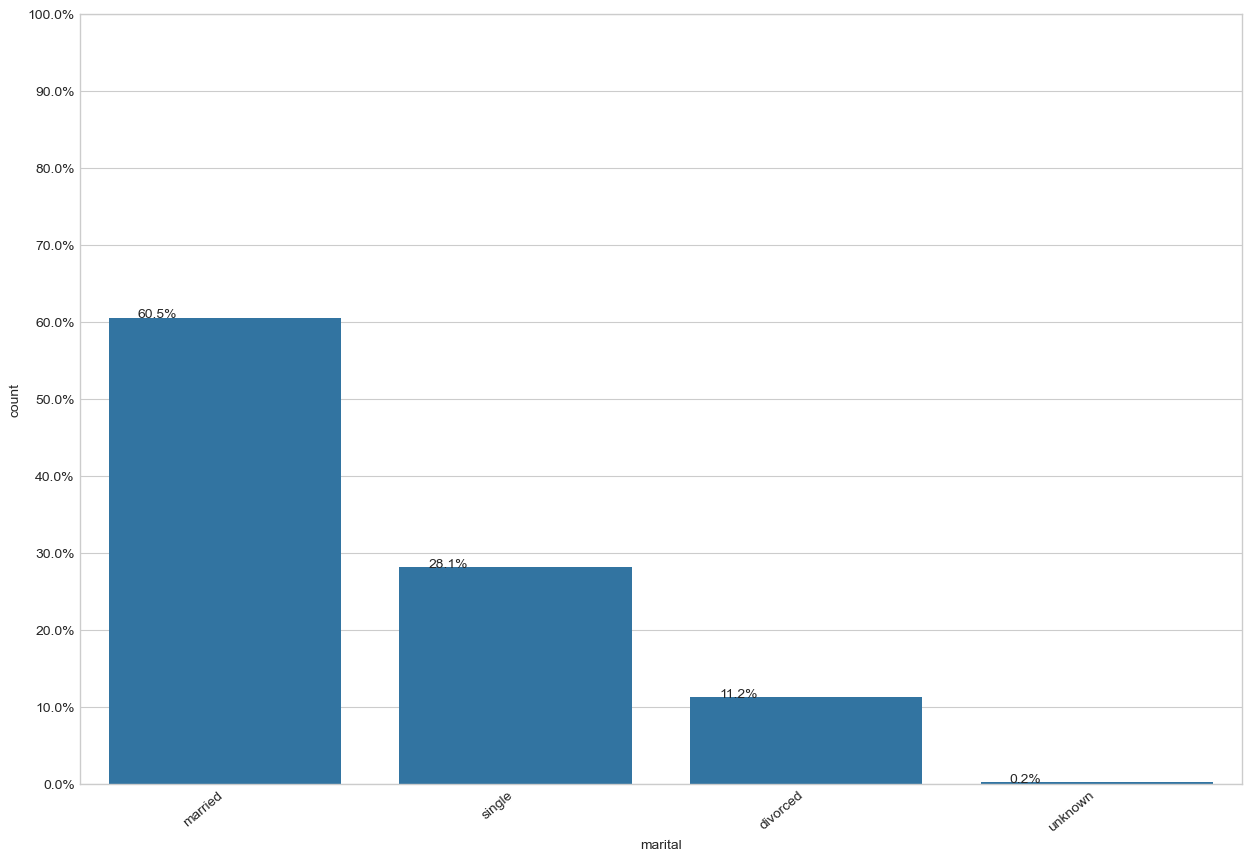

In [442]:
countplot("marital", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


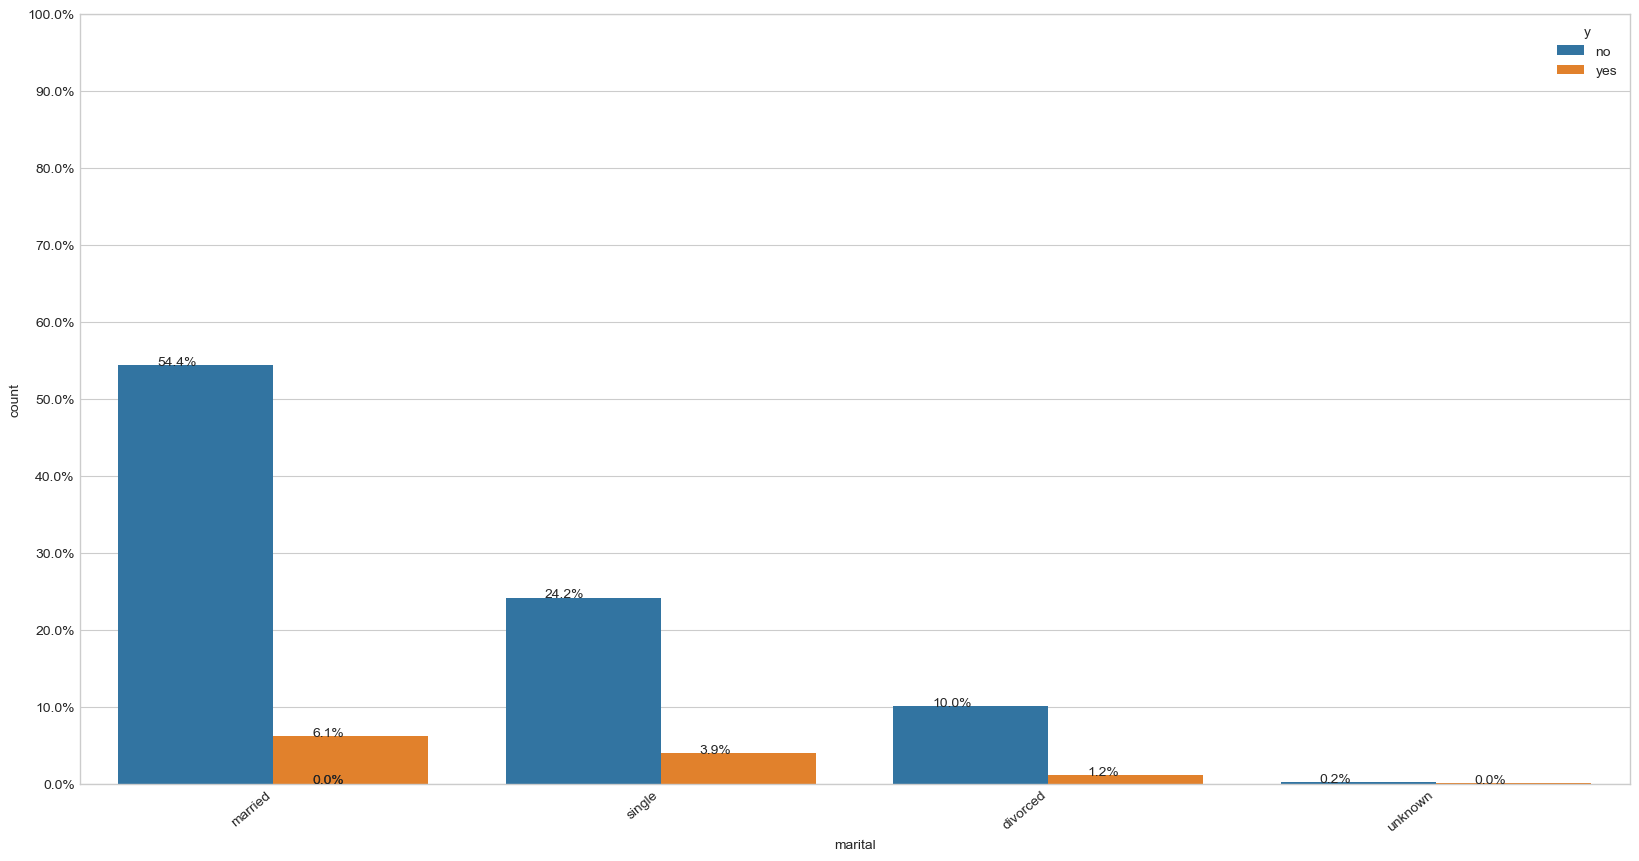

In [443]:
countplot_withY("marital", data)

Majority of the customers are married. Followed by Single, divorced and unknown.

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


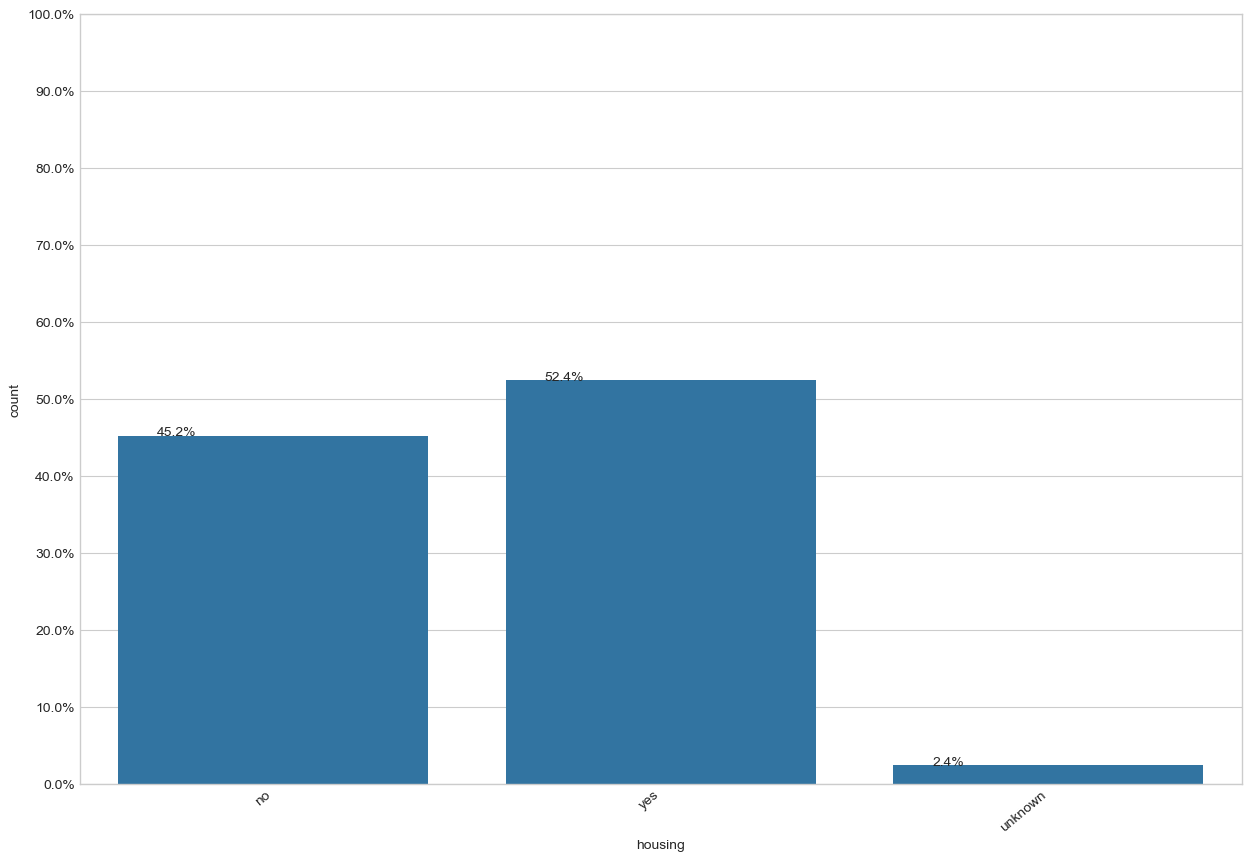

In [444]:
countplot("housing", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


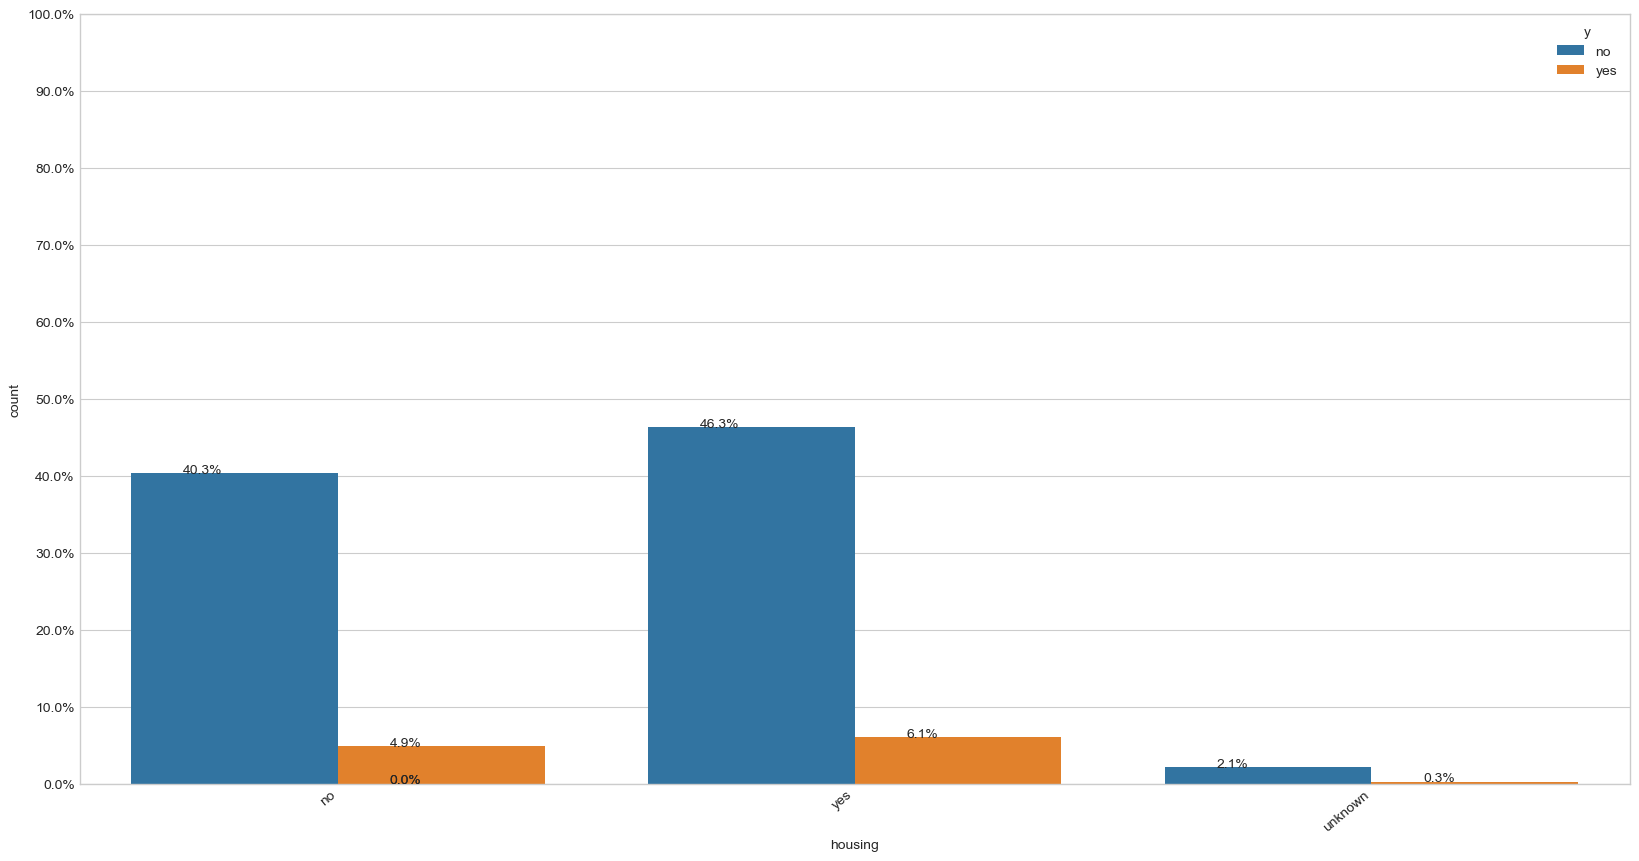

In [445]:
countplot_withY("housing", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


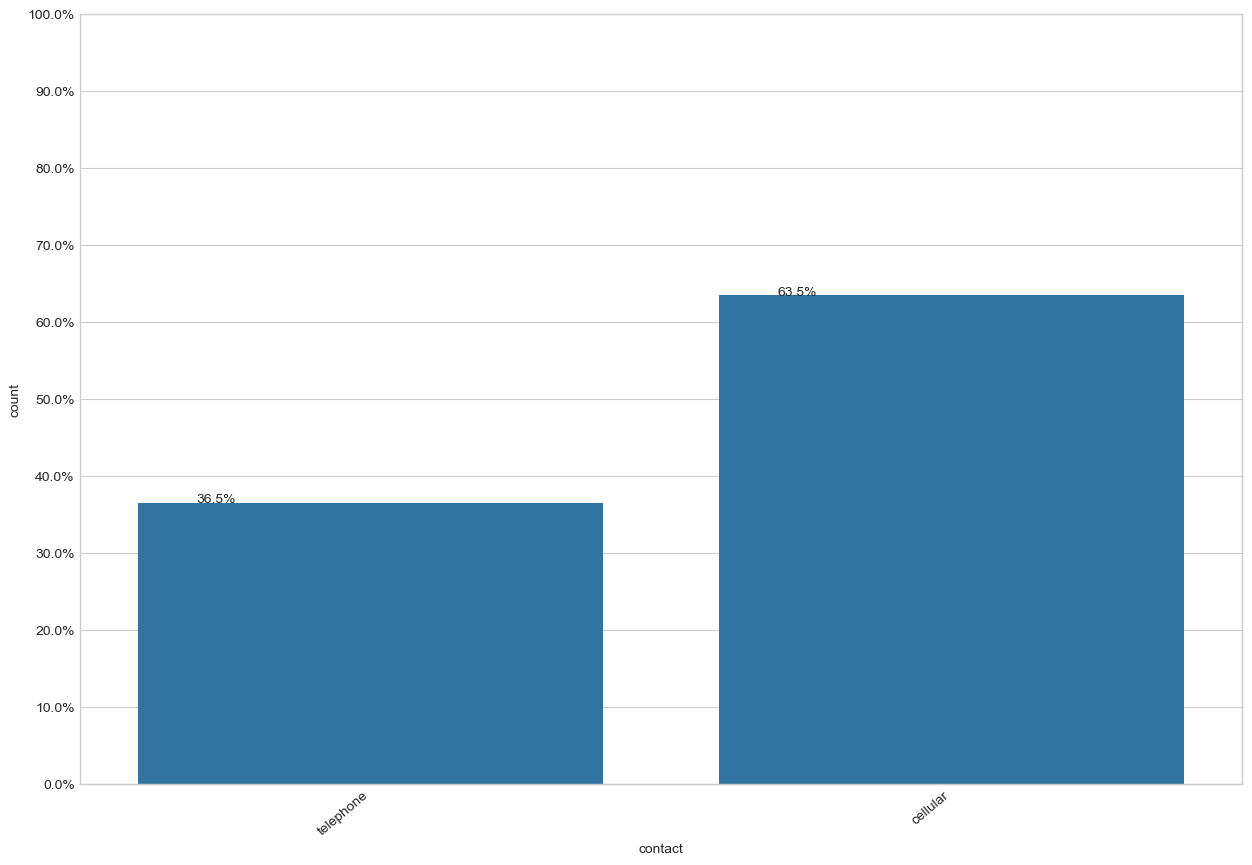

In [446]:
countplot("contact", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


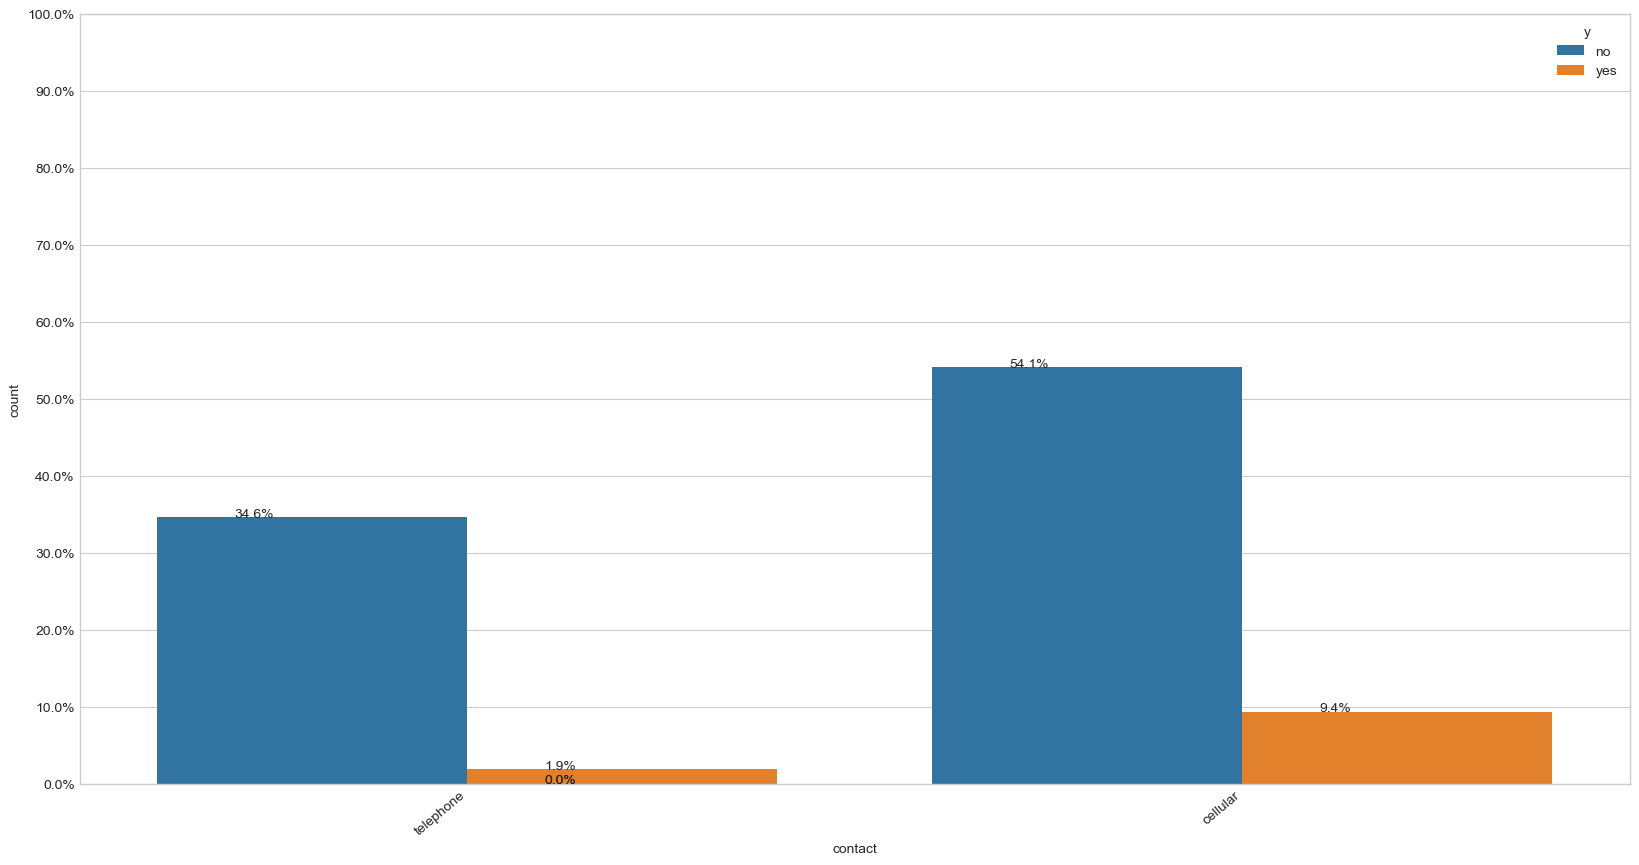

In [447]:
countplot_withY("contact", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


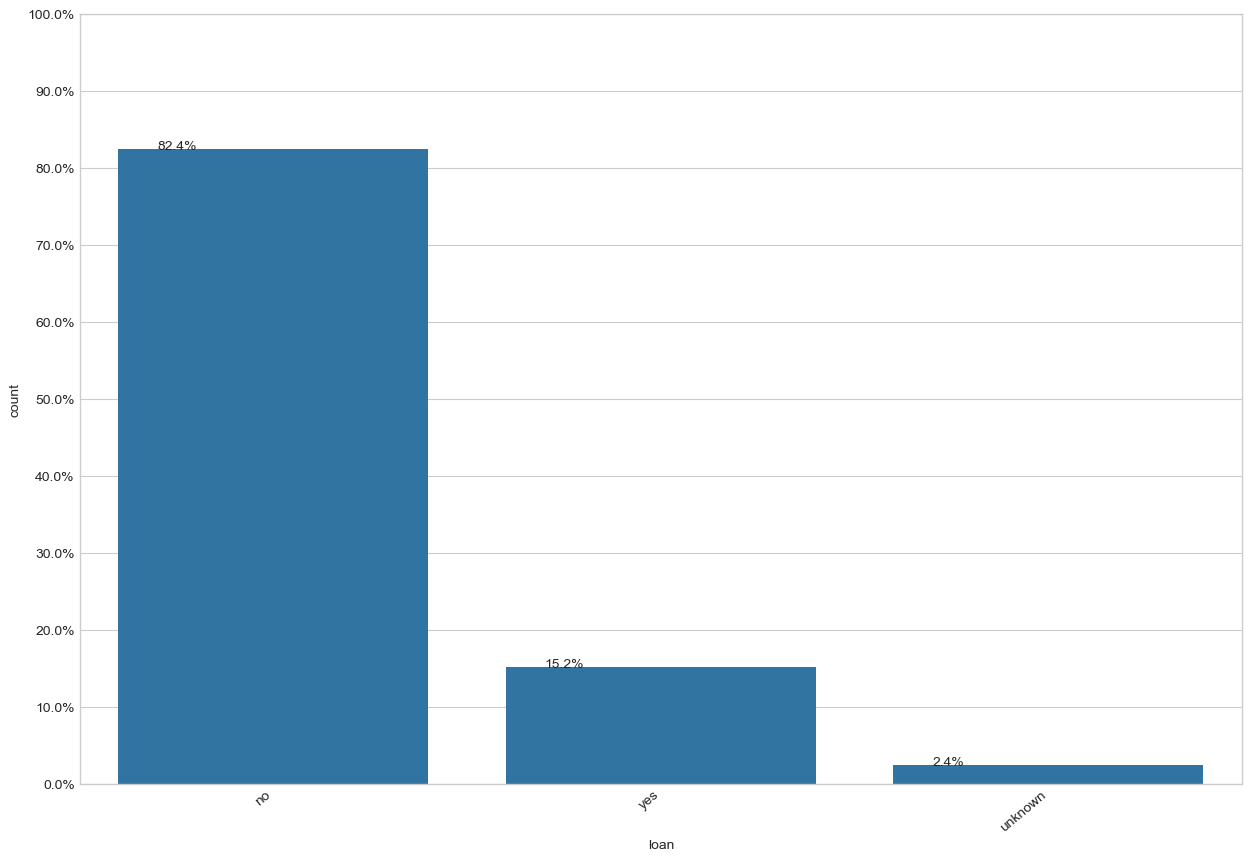

In [448]:
countplot("loan", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


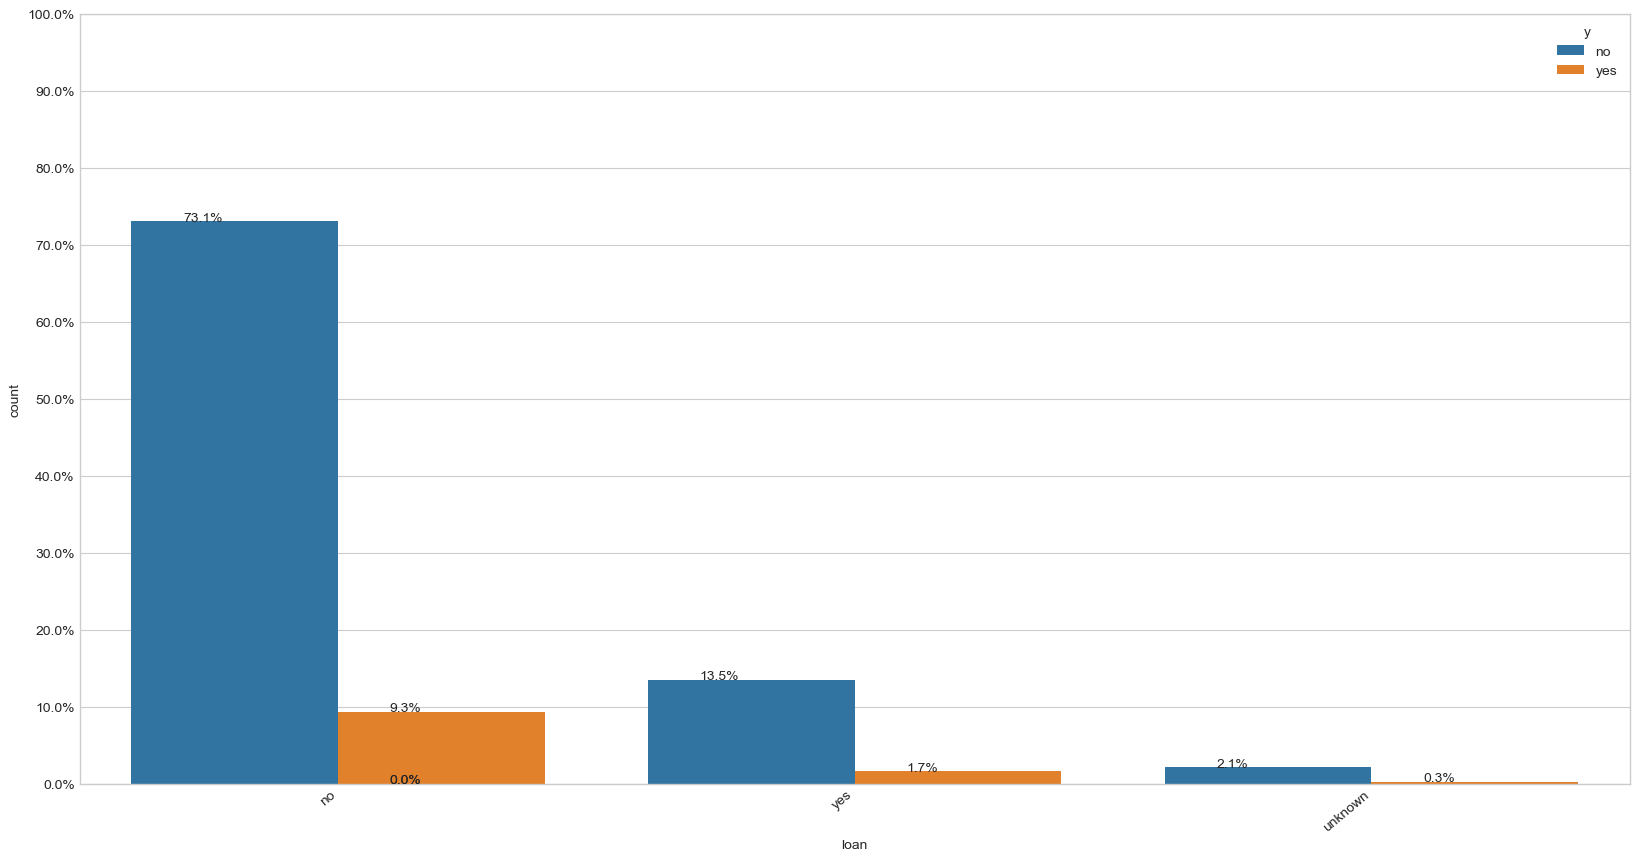

In [449]:
countplot_withY("loan", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


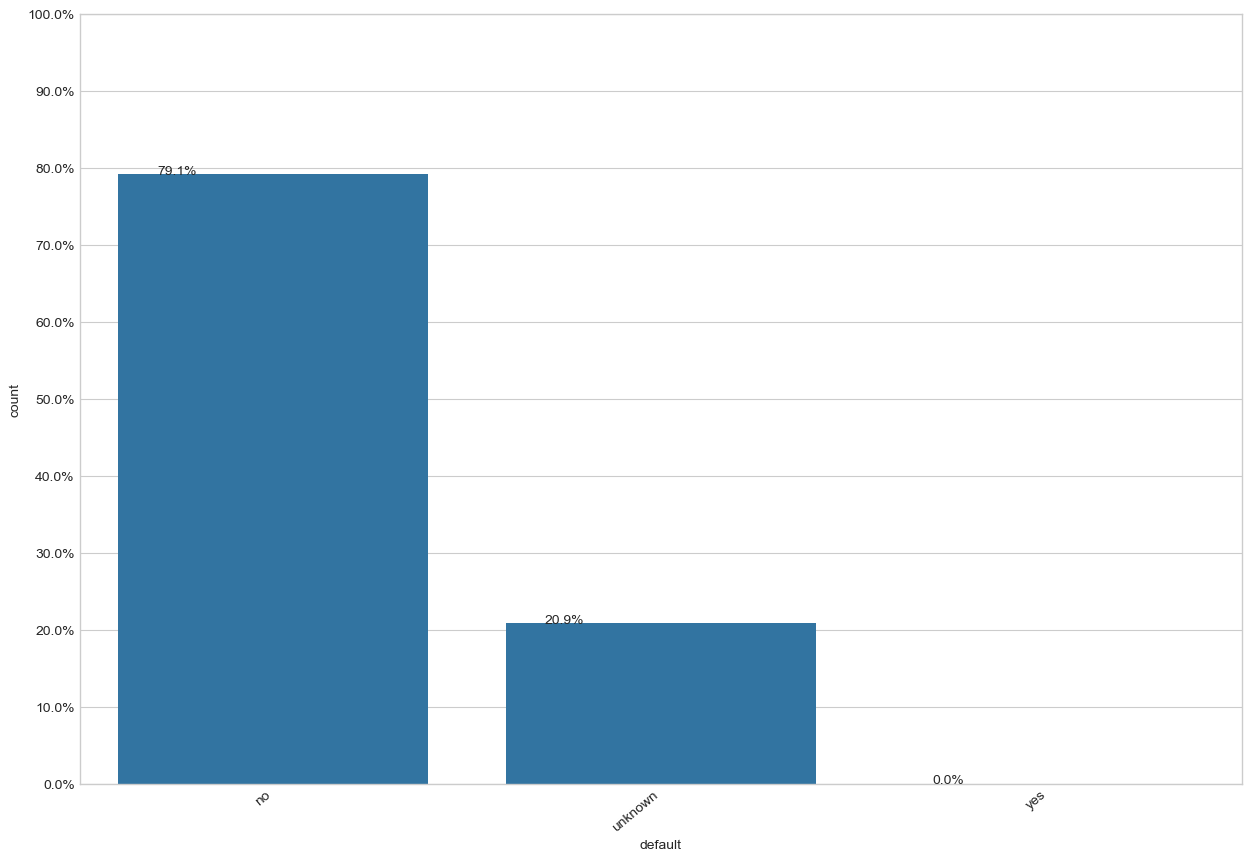

In [450]:
countplot("default", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


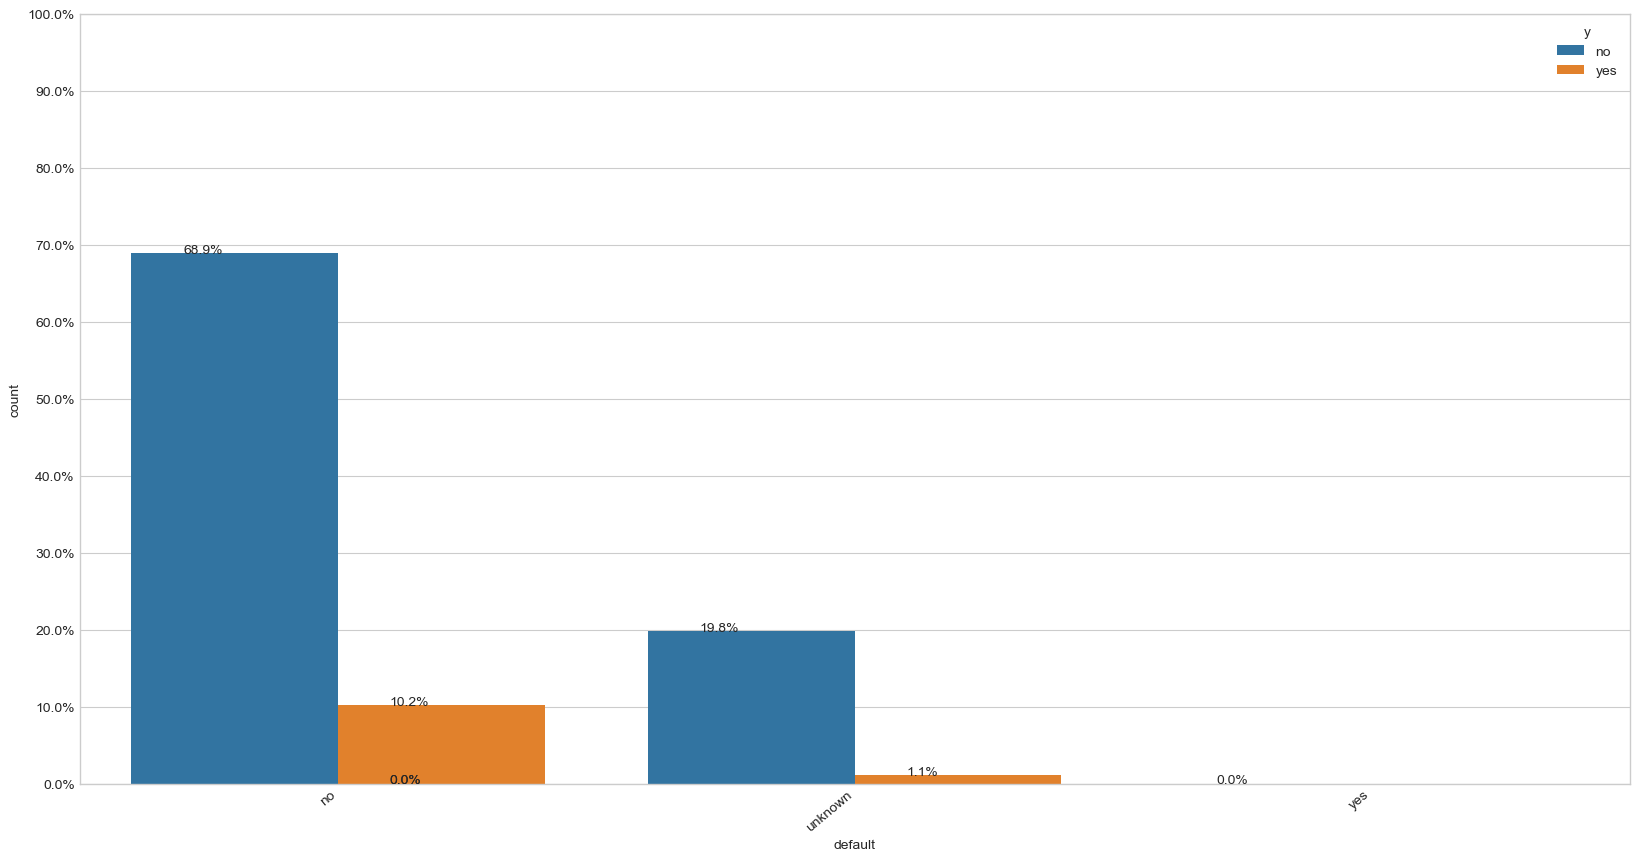

In [451]:
countplot_withY("default", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


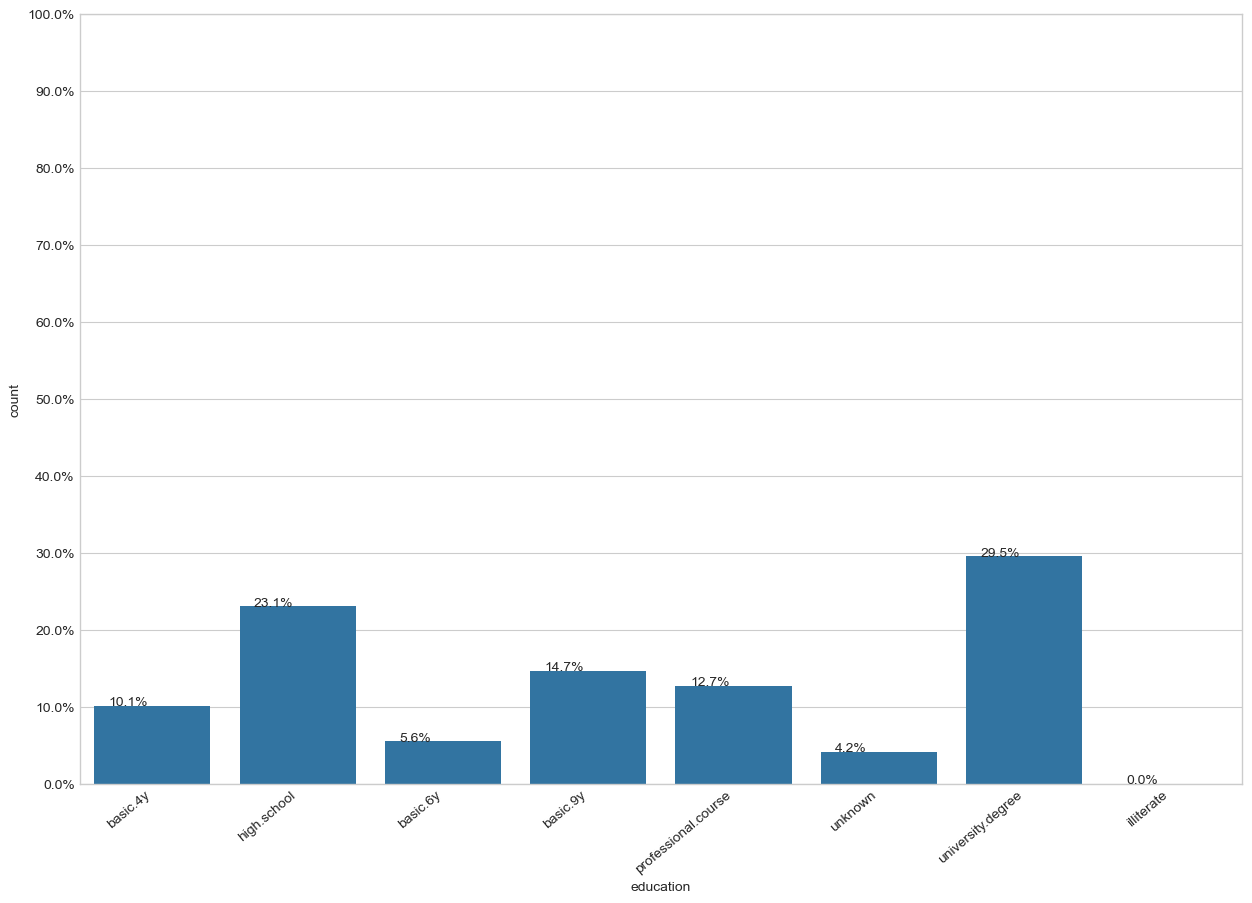

In [452]:
countplot("education", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


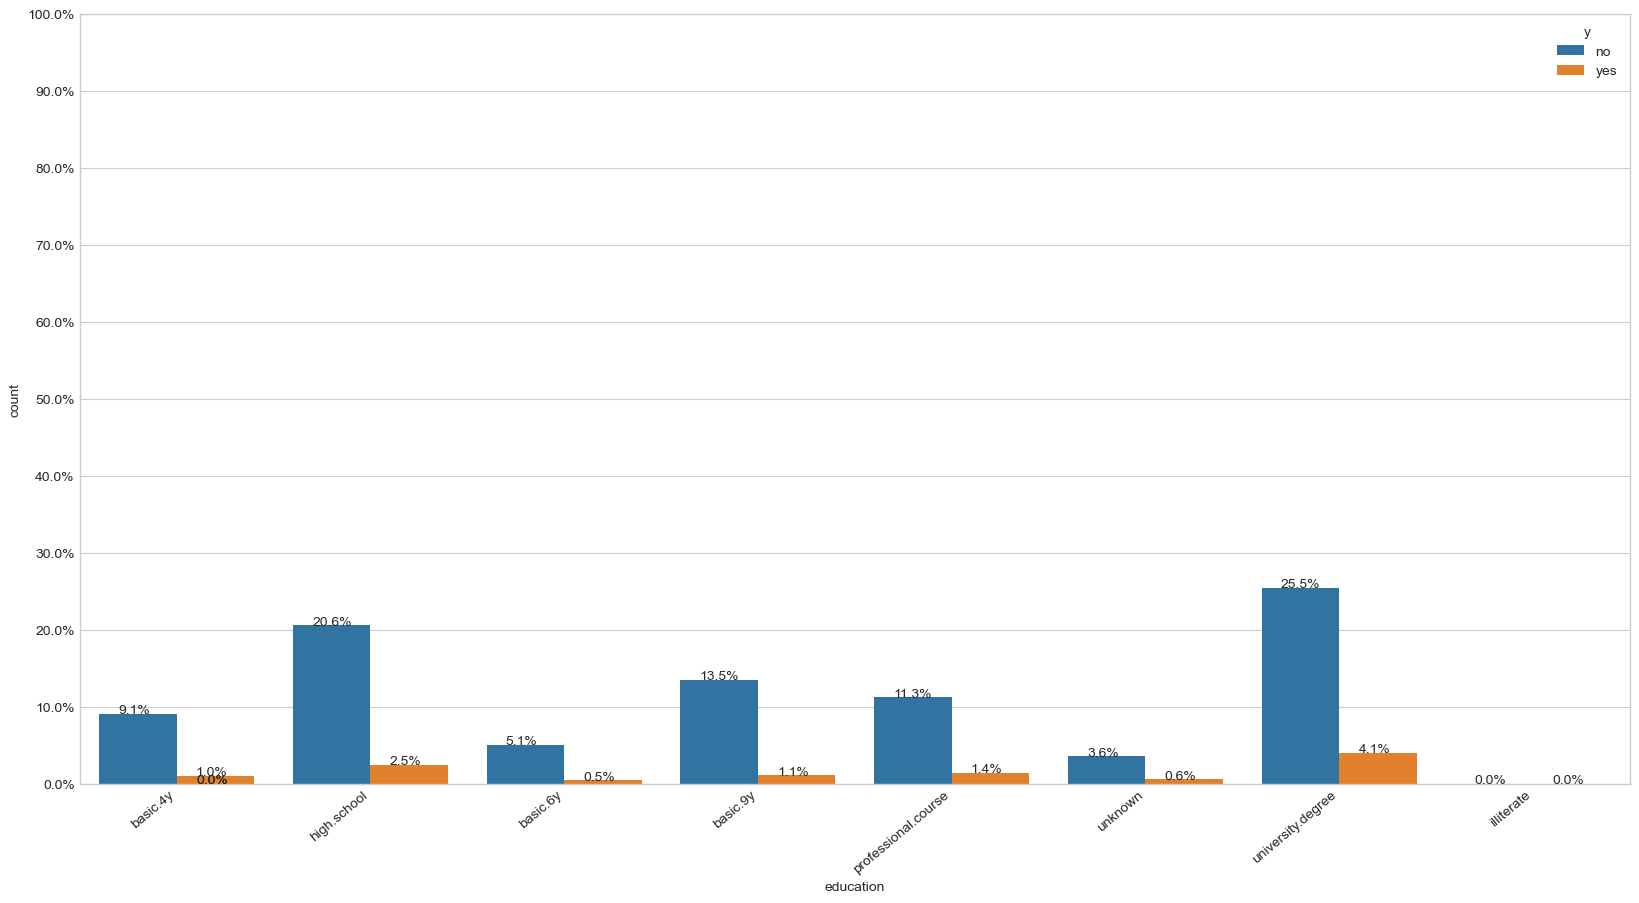

In [453]:
countplot_withY("education", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


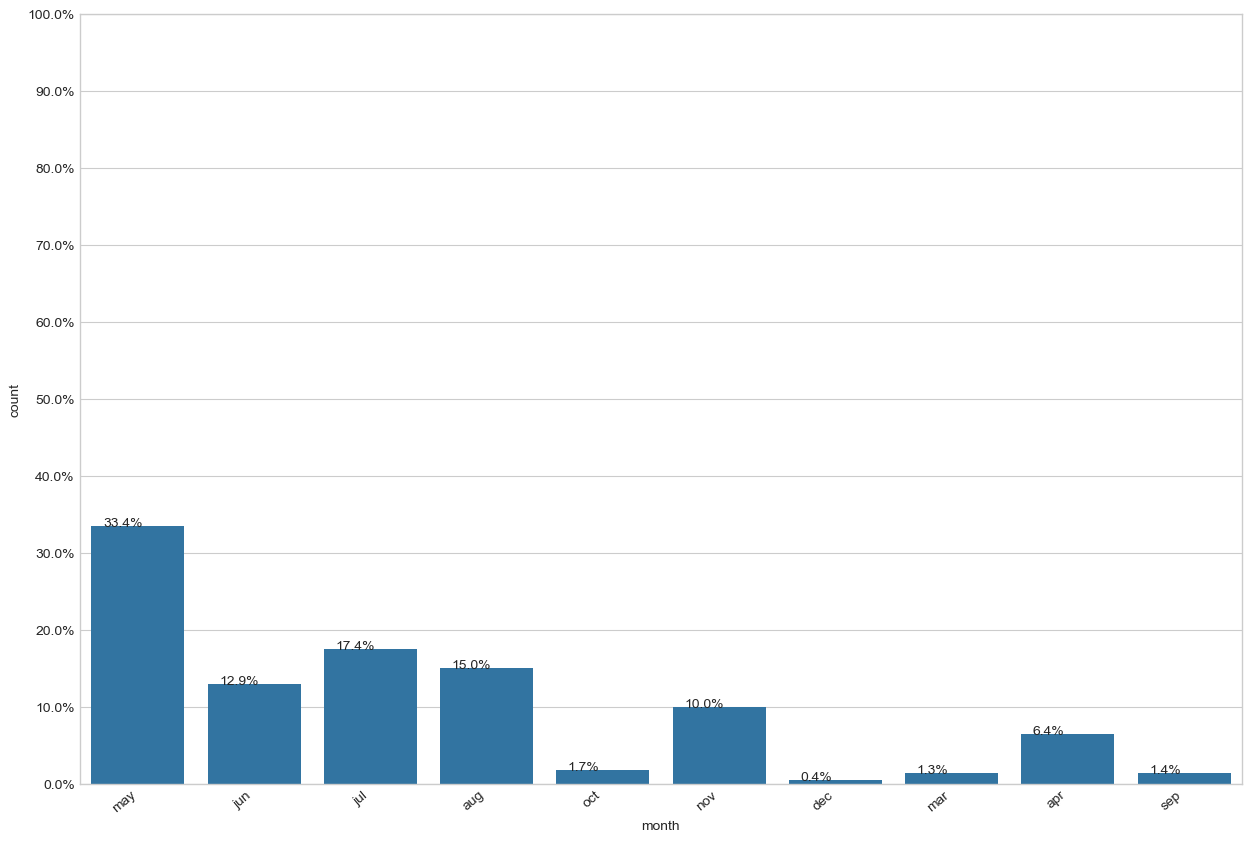

In [454]:
countplot("month", data)


C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


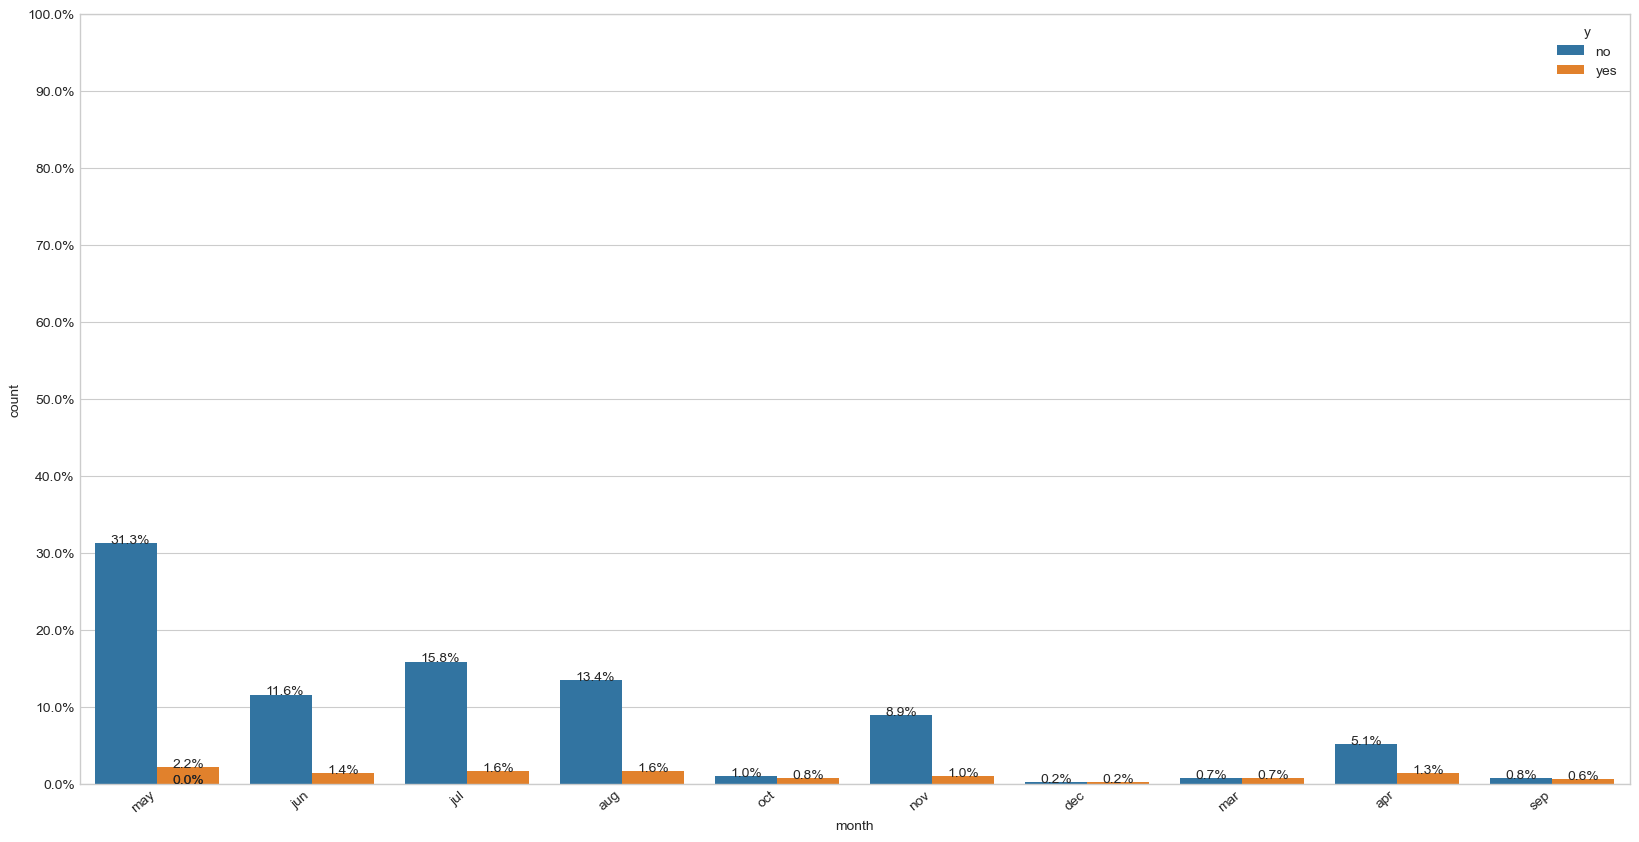

In [455]:
countplot_withY("month", data)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\985178281.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


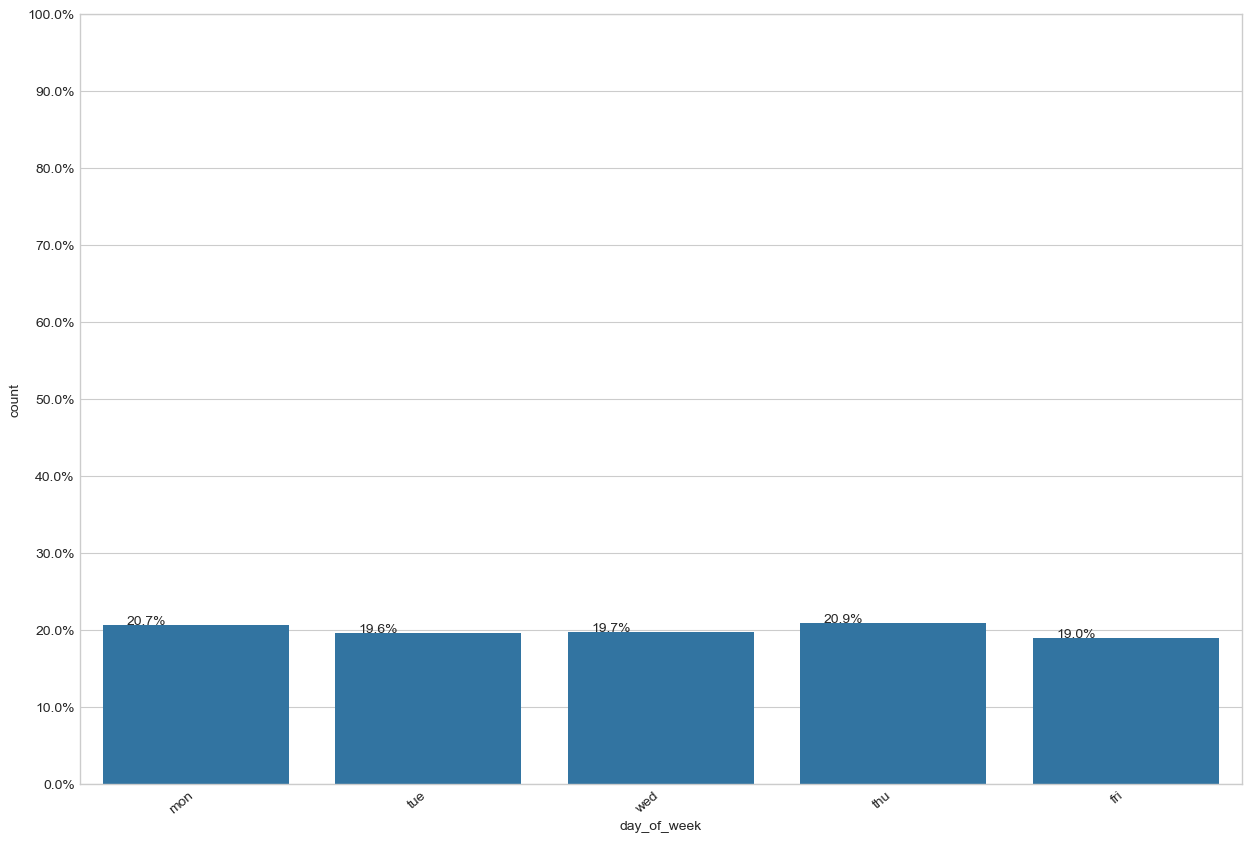

In [456]:
countplot("day_of_week", data)


C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\659137878.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


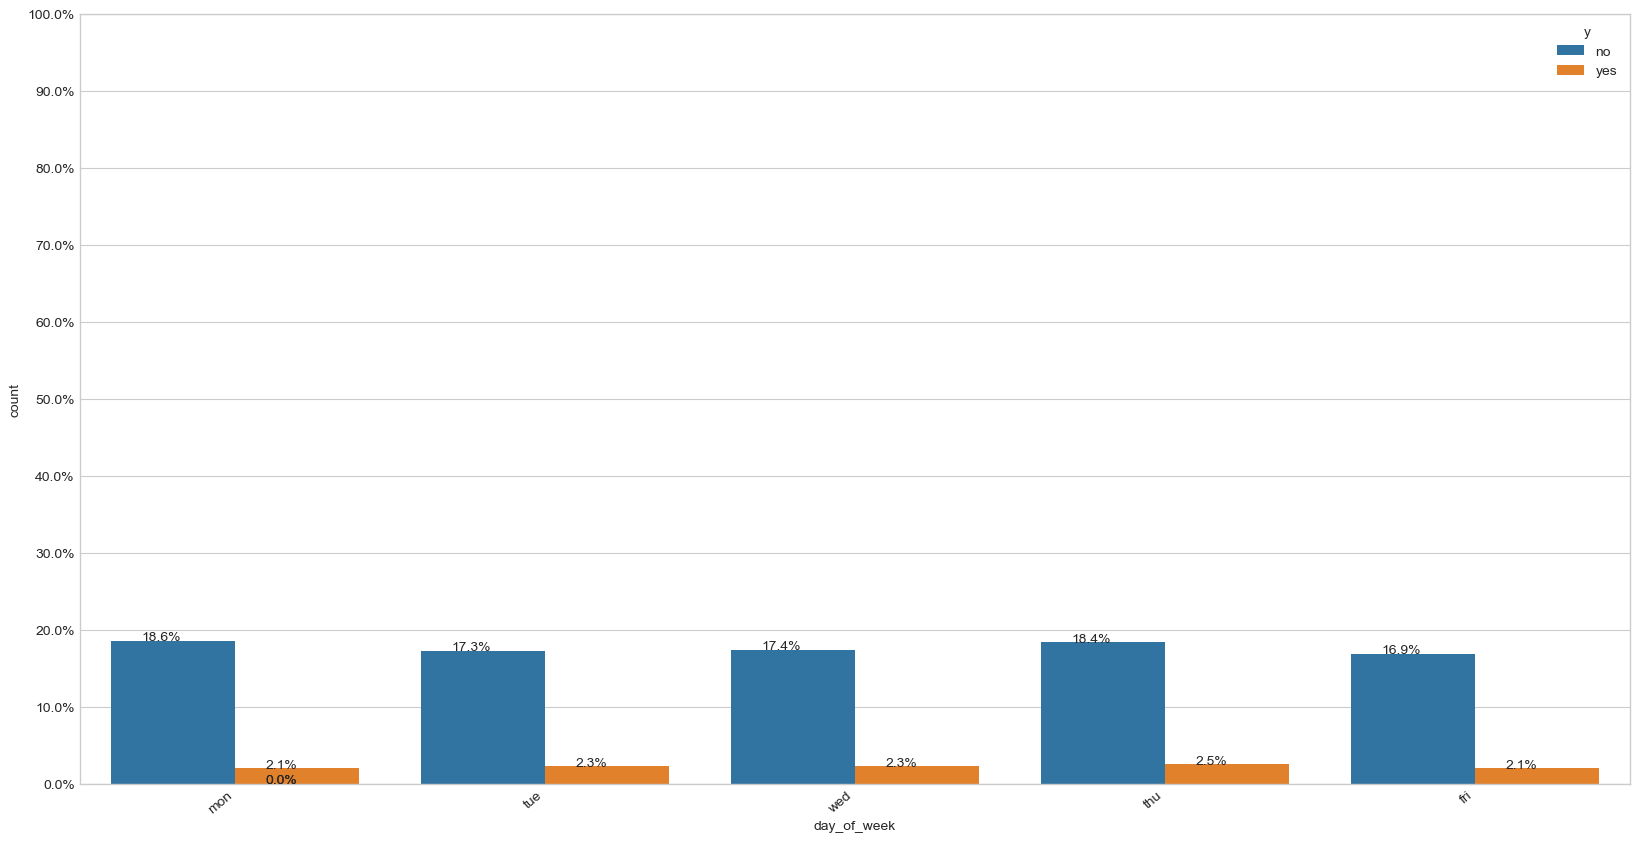

In [457]:
countplot_withY("day_of_week", data)

Now we can plot the distributin of each feature all in one

In [458]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\4035833120.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset[column])
C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\4035833120.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(yticklabels=substrings)
C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\4035833120.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(yticklabels=substrings)
C:\Users\Tobias\AppData\Local\Temp\ipykernel_560\4035833120.

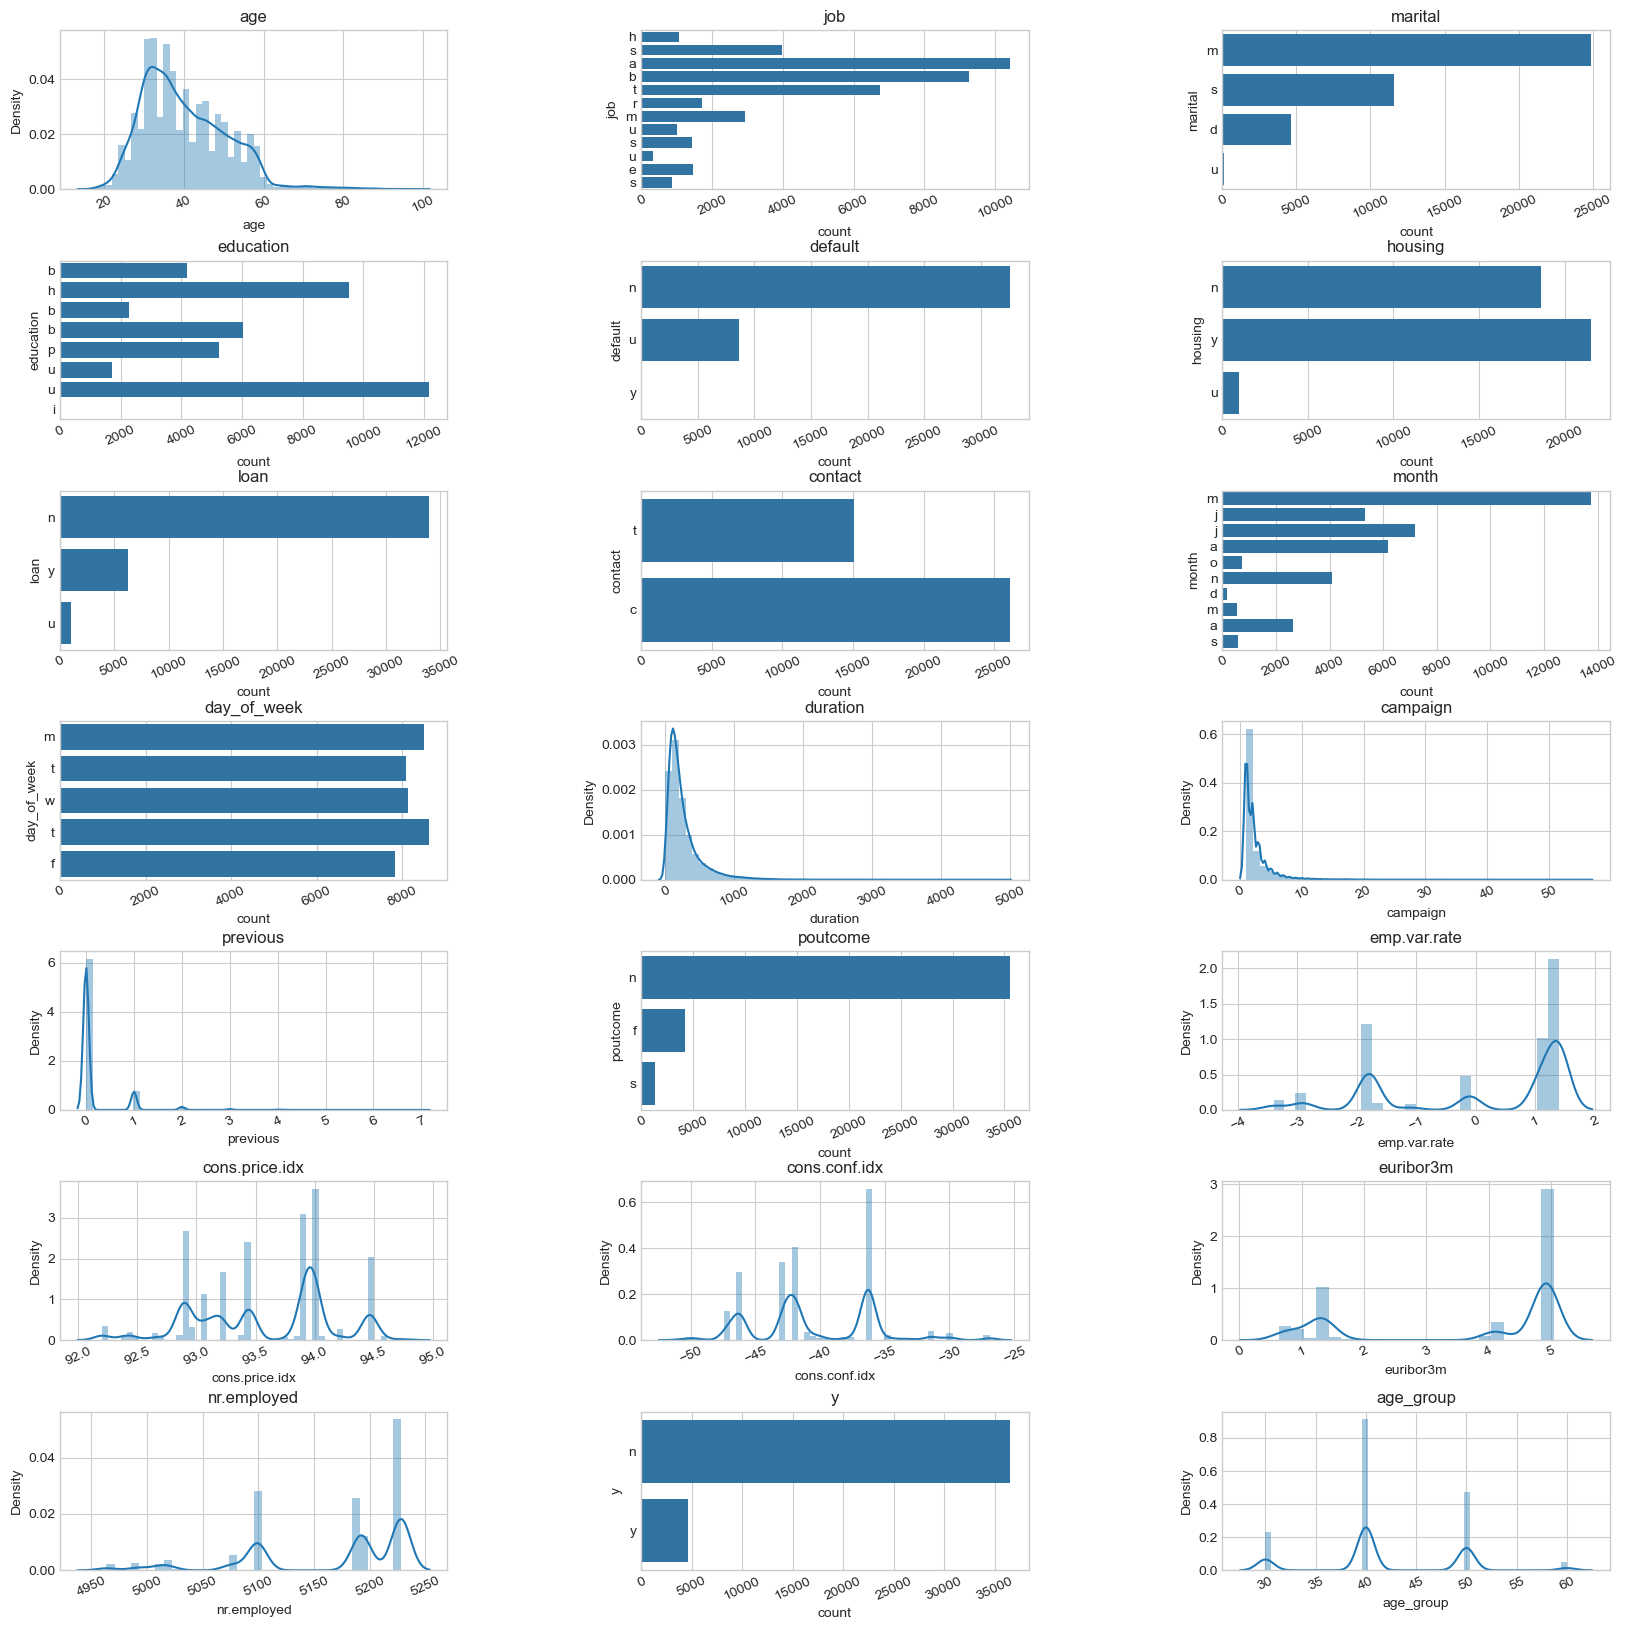

In [459]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:1] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            try:
                g = sns.distplot(dataset[column])
                plt.xticks(rotation=25)
            except RuntimeError as re:
                if str(re).startswith("Selected KDE bandwidth is 0. Canot estimate density."):
                    sns.distplot(dataset[column], kde_kws={'bw': 0.1})
                else:
                   raise re
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [460]:
lst = [data]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [461]:
data["month_int"].value_counts()

month_int
5.0     13769
7.0      7174
8.0      6178
6.0      5318
11.0     4101
4.0      2632
10.0      718
9.0       570
3.0       546
12.0      182
Name: count, dtype: int64

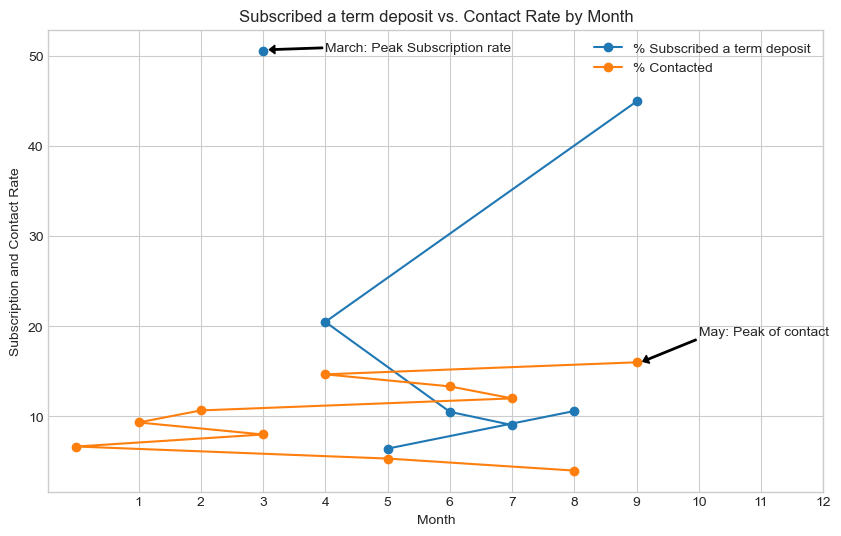

In [462]:
count_month_y = pd.crosstab(data['y'],data['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_y = count_month_y.transpose()

month = pd.DataFrame(data['month_int'].value_counts()).reset_index()
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscribed a term deposit'] = count_month_y['yes']
month.drop('month_int',axis = 1,inplace = True)
month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)


plot_month = month[['% Subscribed a term deposit','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')
plt.title('Subscribed a term deposit vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')
ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
# Annotation: peak of subscription rate
y = month['% Subscribed a term deposit'].max()
x = month['% Subscribed a term deposit'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
plt.show()

The graphic above shows the bank’s contact rate and clients’ response rate in each month in each month.The trends of the lines have diffrent directions. This can be interpret on two ways. Either the bank starts to contact the clients when the demand of deposits starts to decrease or that the bank has bad timing for contacting. The contact rate is the highest in may and august and on other hand, the highest subscription rate occured in march, september and october.


### Correlation matrix of numerical features

In [463]:
#Change 'day' from words to numbers for easier analysis
#"mon","tue","wed","thu","fri"
lst = [data]
for column in lst:
    column.loc[column["day_of_week"] == "mon", "day_int"] = 1
    column.loc[column["day_of_week"] == "tue", "day_int"] = 2
    column.loc[column["day_of_week"] == "wed", "day_int"] = 3
    column.loc[column["day_of_week"] == "thu", "day_int"] = 4
    column.loc[column["day_of_week"] == "fri", "day_int"] = 5
    

In [464]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [465]:
count_age_y = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_y = count_age_y.transpose()

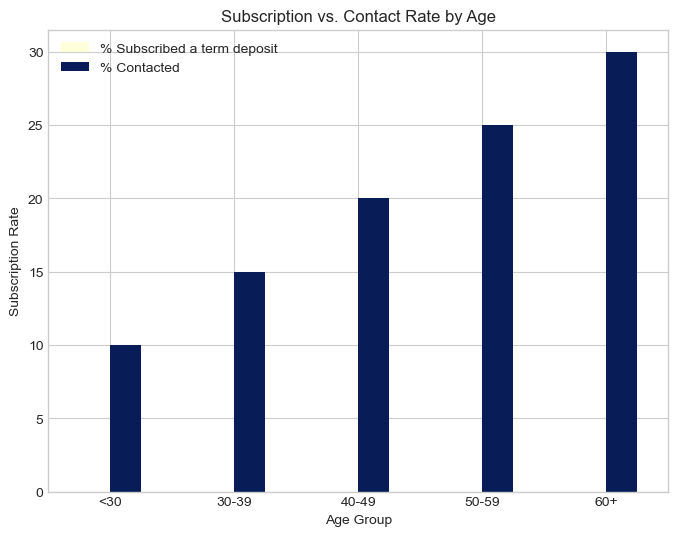

In [466]:
age = pd.DataFrame(data['age_group'].value_counts()).reset_index()
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscribed a term deposit'] = count_age_y['yes']
age.drop('age_group',axis = 1,inplace = True)
age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscribed a term deposit','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), cmap='YlGnBu')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

In [467]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
age_group         float64
month_int         float64
day_int           float64
dtype: object

In [468]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
for col in cols:
    data[col] =pd.Categorical(data[col])
    display(data[col].head())

0    housemaid
1     services
2     services
3       admin.
4     services
Name: job, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

0    married
1    married
2    married
3    married
4    married
Name: marital, dtype: category
Categories (4, object): ['divorced', 'married', 'single', 'unknown']

0       basic.4y
1    high.school
2    high.school
3       basic.6y
4    high.school
Name: education, dtype: category
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

0         no
1    unknown
2         no
3         no
4         no
Name: default, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']

0     no
1     no
2    yes
3     no
4     no
Name: housing, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']

0     no
1     no
2     no
3     no
4    yes
Name: loan, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']

0    telephone
1    telephone
2    telephone
3    telephone
4    telephone
Name: contact, dtype: category
Categories (2, object): ['cellular', 'telephone']

0    may
1    may
2    may
3    may
4    may
Name: month, dtype: category
Categories (10, object): ['apr', 'aug', 'dec', 'jul', ..., 'may', 'nov', 'oct', 'sep']

0    mon
1    mon
2    mon
3    mon
4    mon
Name: day_of_week, dtype: category
Categories (5, object): ['fri', 'mon', 'thu', 'tue', 'wed']

0    nonexistent
1    nonexistent
2    nonexistent
3    nonexistent
4    nonexistent
Name: poutcome, dtype: category
Categories (3, object): ['failure', 'nonexistent', 'success']

In [469]:
sns.heatmap(data)

ValueError: could not convert string to float: 'housemaid'

In [317]:
def drawheatmap(df):
    matrix = df.corr()
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu', ax=ax, annot=True, linewidth=0.1)

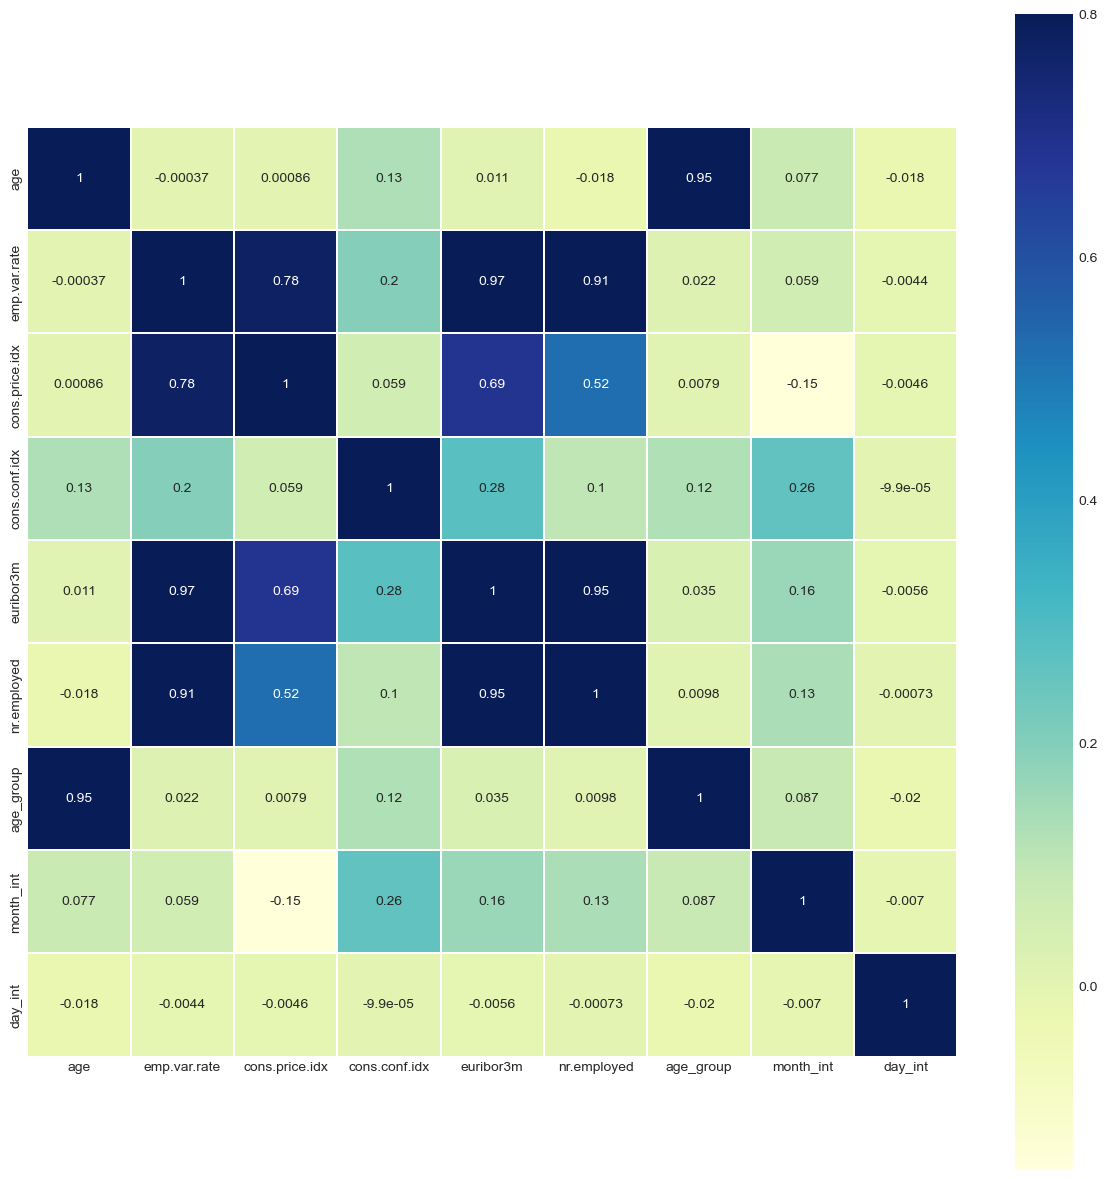

In [319]:
df_num = data.select_dtypes(include=[float, int])
drawheatmap(df_num)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.